# 1. Imports

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2. Testing Dummy Model for First Kaggle Submission.

In [33]:
df = pd.read_csv("train.csv") 
X = df.drop("target", axis=1) 
y = df['target'] 

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier().fit(X,y)

# X_test = pd.read_csv("test.csv")
# y_pred=model.predict(X_test)

# submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_pred})
# submission.to_csv('submission.csv',index=False)

# 3. Importing Libraries

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 3. Loading the Data

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# 4. (EDA)Exploratory Data Analysis

# 4.1 Data Description


* 'MachineID' : Unique Identifier for Each Machine

* 'ProductName': Name of the Installed Antivirus Product

* 'EngineVersion': Version of the Antivirus Engine

* 'AppVersion' : Version of the Antivirus Application

* 'SignatureVersion': Version of the Antivirus Signatures

* 'IsBetaUser': Whether the User is on a Beta Version.

* 'RealTimeProtectionState': Status of Real-Time Protection

* 'IsPassiveModeEnabled' : Whether Passive Mode is Enabled

* 'AntivirusConfigID' : Identifier for Antivirus Configuration

* 'NumAntivirusProductsInstalled' : Number of Installed Antivirus Products

* 'NumAntivirusProductsEnabled' : Number of Enabled Antivirus Products

* 'HasTpm' : Whether the Machine has a Trusted Platform Module (TPM)

* 'CountryID': Identifier for the Country of the Machine

* 'CityID' : Identifier for the City of the Machine

* 'GeoRegionID' : Identifier for the Machine's Organization or Industry

* 'LocaleEnglishNameID' : English Locale Name ID of the Current User

* 'PlatformType' : Platform Type Derived from OS and Processor Information

* 'Processor' : Processor Architecture of the Installed OS

* 'OSVersion' : Operating System Version

* 'OSBuildNumber' : OS Build Number

* 'OSProductSuite' : Product Suite Mask for the Operating System

* 'OsPlatformSubRelease' : Sub-release of the Operating System

* 'OSBuildLab' : Detailed OS Build Information

* 'SKUEditionName' : SKU Edition of the Operating System

* 'IsSystemProtected' : Whether the System has Active Protection.

* 'AutoSampleSubmissionEnabled' : Auto Sample Submission Setting

* 'SMode' : Whether the Device is Running in S Mode

* 'IEVersionID' : Internet Explorer Version Identifier

* 'FirewallEnabled' : Whether Windows Firewall is Enabled

* 'EnableLUA',

* 'MDC2FormFactor',

* 'DeviceFamily',

* 'OEMNameID',

* 'OEMModelID',

* 'ProcessorCoreCount',

* 'ProcessorManufacturerID',

* 'ProcessorModelID',

* 'PrimaryDiskCapacityMB',

* 'PrimaryDiskType',

* 'SystemVolumeCapacityMB',

* 'HasOpticalDiskDrive',

* 'TotalPhysicalRAMMB',

* 'ChassisType',

* 'PrimaryDisplayDiagonalInches',

* 'PrimaryDisplayResolutionHorizontal',

* 'PrimaryDisplayResolutionVertical',

* 'PowerPlatformRole',

* 'InternalBatteryNumberOfCharges',

* 'NumericOSVersion',

* 'OSArchitecture',

* 'OSBranch',

* 'OSBuildNumberOnly',

* 'OSBuildRevisionOnly',

* 'OSEdition',

* 'OSSkuFriendlyName',

* 'OSInstallType',

* 'OSInstallLanguageID',

* 'OSUILocaleID',

* 'AutoUpdateOptionsName',

* 'IsPortableOS',

* 'OSGenuineState',

* 'LicenseActivationChannel',

* 'IsFlightsDisabled',

* 'FlightRing',

* 'FirmwareManufacturerID',

* 'FirmwareVersionID',

* 'IsSecureBootEnabled',

* 'IsVirtualDevice',

* 'IsTouchEnabled',

* 'IsPenCapable',

* 'IsAlwaysOnAlwaysConnectedCapable',

* 'IsGamer',

* 'RegionIdentifier',

* 'DateAS' : Malware signature dates ,

* 'DateOS' : timestamps for OSVersion which gives the time that the OS was last updated

* 'target' : target variable

# 4.2 Sample Data

In [36]:
sample["target"].unique()

array([1, 0])

In [37]:
sample.shape

(10000, 2)

In [38]:
sample.head()

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


# 4.3 Train and Test Data

# Determining Shape of Training and Testing Data

In [39]:
# Checking The shapes of train data
print(f"Train Data Shape : {train.shape}")

# Checking The shapes of test data
print(f"Test Data Shape : {test.shape}")

Train Data Shape : (100000, 76)
Test Data Shape : (10000, 75)


In [40]:
train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [41]:
test.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [ ]:
train.tail()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0
99999,ad9c385b53f2ca788933a39603b84eda,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1003.0,0,7.0,0,7945.0,2.0,...,1,0.0,0,0,0.0,1.0,11.0,2018-07-14 15:36:00,2018-08-14,0


In [85]:
test.tail()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,DaysSinceOSUpdate,DaysSinceMalwareSignature
9995,42d3ddb25eeb149517e2b6871b061df4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1329.0,0,7.0,0,32554.0,3.0,...,0.0,0,0,0.0,0.0,13.0,2018-09-16 18:15:00,2018-09-11,1154.0,1159
9996,3d474c494d797cafc2ab1665711f0f91,win8defender,1.1.15100.1,4.11.15063.0,1.273.894.0,0,7.0,0,53447.0,1.0,...,0.0,0,0,0.0,1.0,1.0,2018-08-05 22:50:00,2017-04-05,630.0,1117
9997,9aee2fc73af8240a688ceb83d41c0418,win8defender,1.1.15200.1,4.18.1807.18075,1.275.504.0,0,7.0,0,47238.0,2.0,...,0.0,0,0,0.0,0.0,11.0,2018-08-31 16:03:00,2018-06-12,1063.0,1143
9998,a2f8c1f88b78271c38767fe43850b359,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,53447.0,1.0,...,0.0,0,0,0.0,0.0,10.0,2018-08-30 18:35:00,2017-12-12,881.0,1142
9999,c1c85a860e30097b03c815aa908cd17d,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1068.0,0,7.0,0,41571.0,2.0,...,0.0,0,0,0.0,0.0,12.0,2018-07-16 16:11:00,2018-07-10,1091.0,1097


# 4.4 Data Statistics

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 78 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   MachineID                           100000 non-null  object        
 1   ProductName                         100000 non-null  object        
 2   EngineVersion                       100000 non-null  object        
 3   AppVersion                          100000 non-null  object        
 4   SignatureVersion                    100000 non-null  object        
 5   IsBetaUser                          100000 non-null  int64         
 6   RealTimeProtectionState             99934 non-null   float64       
 7   IsPassiveModeEnabled                100000 non-null  int64         
 8   AntivirusConfigID                   99924 non-null   float64       
 9   NumAntivirusProductsInstalled       99924 non-null   float64       
 10  NumAntivi

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   MachineID                           10000 non-null  object        
 1   ProductName                         10000 non-null  object        
 2   EngineVersion                       10000 non-null  object        
 3   AppVersion                          10000 non-null  object        
 4   SignatureVersion                    10000 non-null  object        
 5   IsBetaUser                          10000 non-null  int64         
 6   RealTimeProtectionState             9991 non-null   float64       
 7   IsPassiveModeEnabled                10000 non-null  int64         
 8   AntivirusConfigID                   9998 non-null   float64       
 9   NumAntivirusProductsInstalled       9998 non-null   float64       
 10  NumAntivirusProductsEna

In [46]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [47]:
test.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,10000.0,9991.000000,10000.000000,9998.00000,9998.000000,9998.000000,10000.00000,10000.000000,9939.000000,9999.000000,...,9965.0,9968.000000,9971.000000,10000.000000,9993.000000,10000.000000,10000.000000,9988.000000,9938.000000,9938.000000
mean,0.0,6.848864,0.017400,48122.25075,1.327065,1.019004,0.99620,107.675900,80985.386055,168.507151,...,0.0,404.363864,33258.776853,0.505800,0.003202,0.131000,0.041200,0.056468,0.301067,7.906219
std,0.0,1.014203,0.130763,13611.92055,0.524149,0.157627,0.06153,63.268649,49085.060889,89.279554,...,0.0,220.361535,21239.190886,0.499991,0.056501,0.337417,0.198762,0.230834,0.458745,4.522045
min,0.0,0.000000,0.000000,645.00000,1.000000,0.000000,0.00000,1.000000,41.000000,1.000000,...,0.0,93.000000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.00000,1.000000,1.000000,1.00000,50.000000,36164.000000,89.000000,...,0.0,142.000000,13182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.00000,1.000000,1.000000,1.00000,97.000000,82373.000000,181.000000,...,0.0,500.000000,33075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.00000,2.000000,1.000000,1.00000,160.000000,122884.500000,258.000000,...,0.0,556.000000,52530.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,0.0,8.000000,1.000000,70330.00000,5.000000,4.000000,1.00000,222.000000,167953.000000,295.000000,...,0.0,1075.000000,72038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [48]:
train.describe(include="object")

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,...,13,20,18,9,6,4,6,7,2695,112
top,d45940eafb98ddb67cd89eefb5dac822,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,...,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


In [49]:
test.describe(include="object")

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,9997
unique,9998,2,31,59,1438,4,3,3,9,171,...,12,15,14,9,6,4,5,7,1413,95
top,f8552815f215d99bd5c0db06e09afb0a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,9972,4501,6169,133,9831,9144,9832,4559,4279,...,4666,3925,3925,3160,4452,8989,5171,9417,133,1976


# 4.5 Box-Plot for Outlier Detection

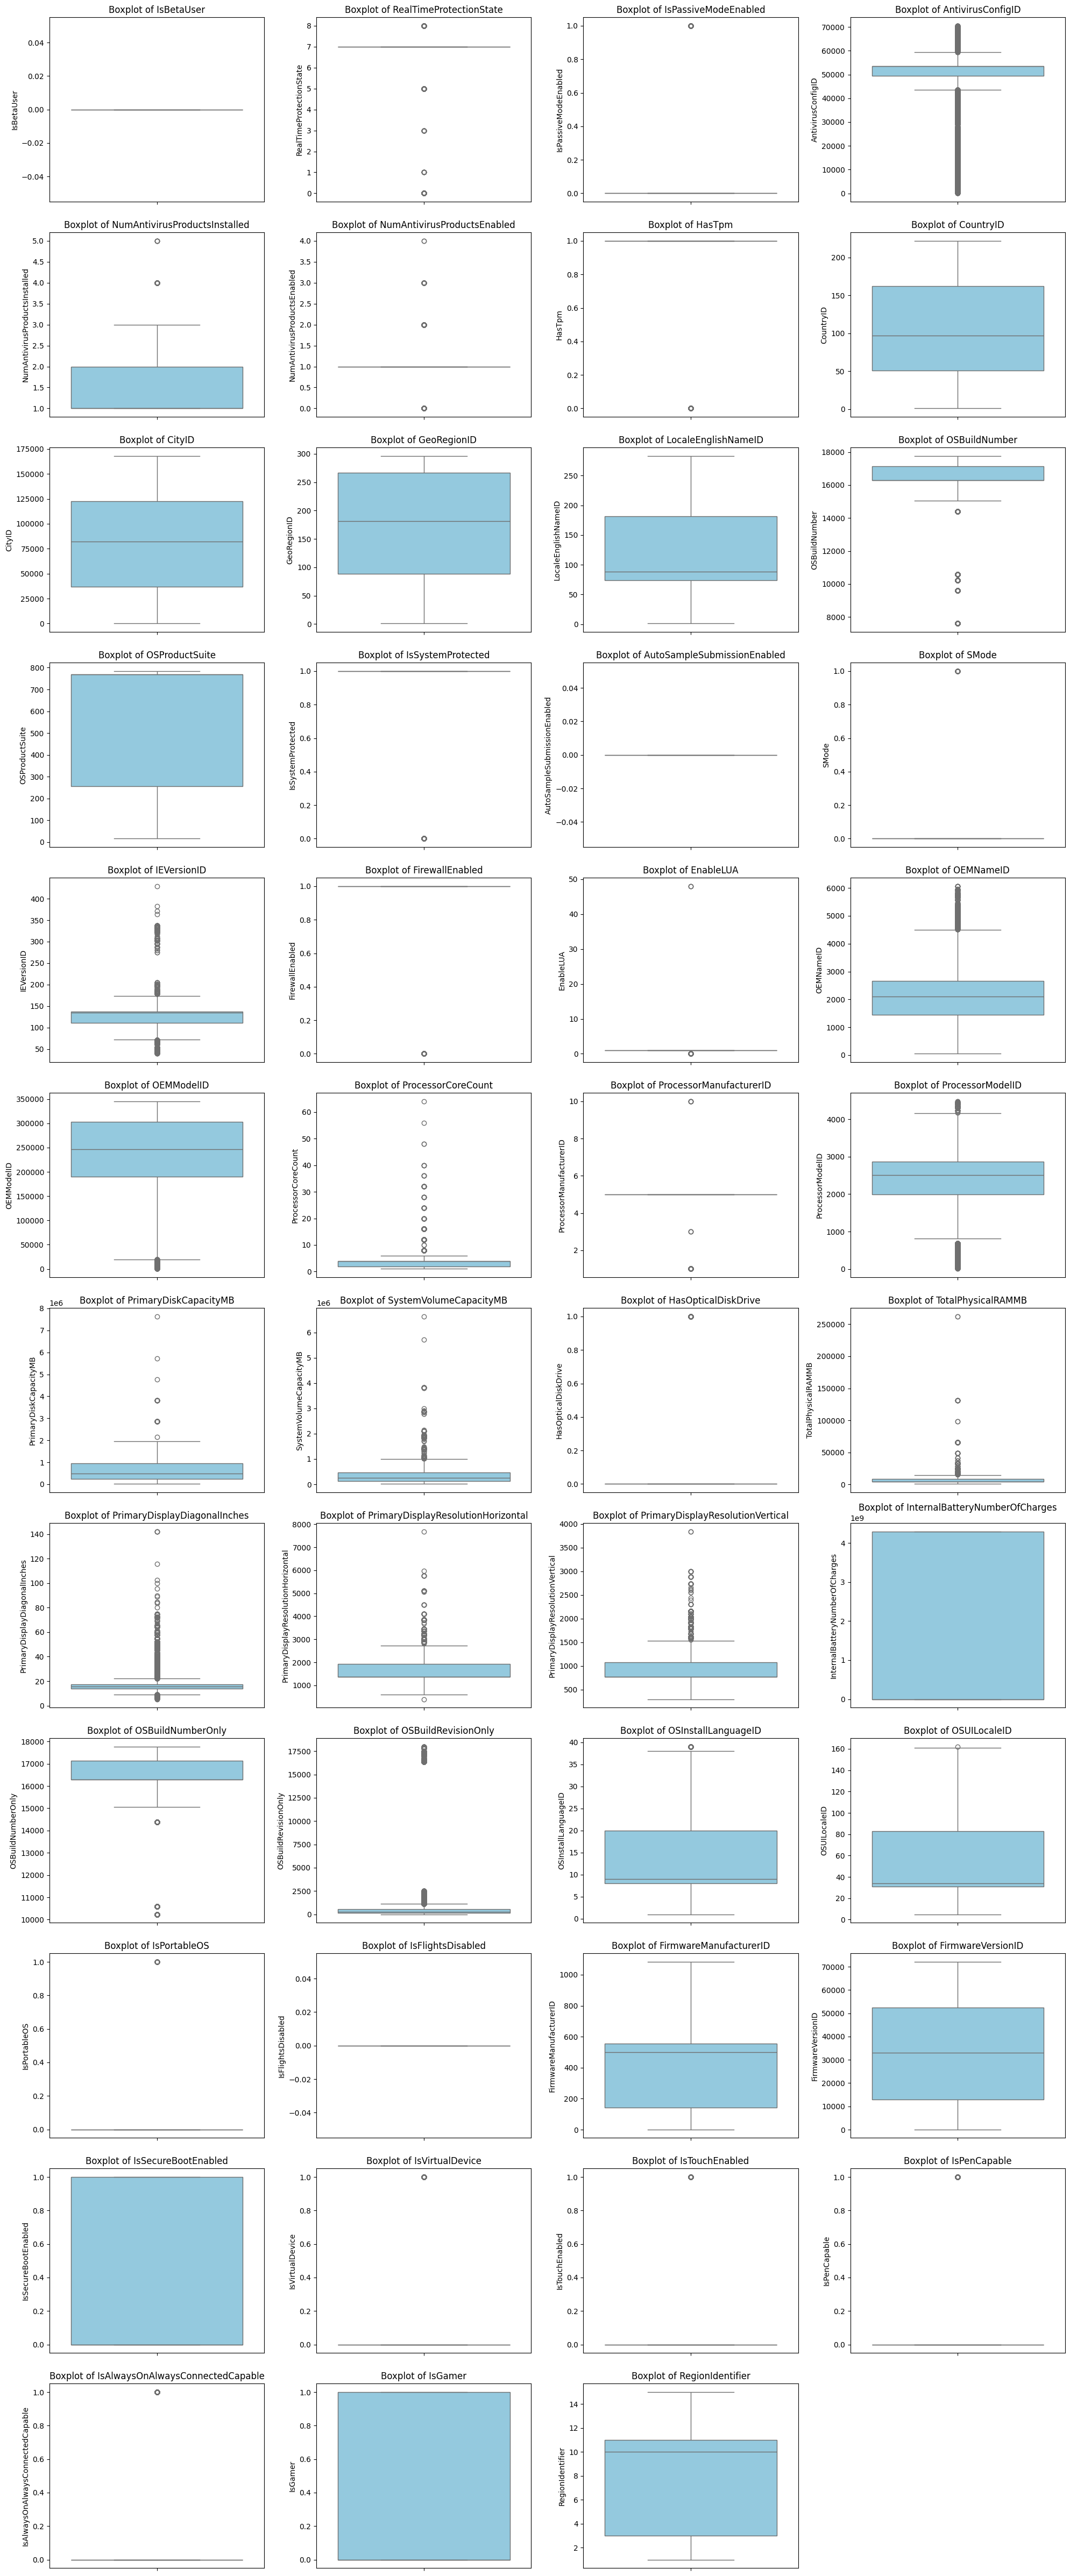

In [50]:
# Select numerical columns from the new train dataset
numerical_cols_all = train.select_dtypes(include=['int64', 'float64']).drop(columns=['target']).columns

# Define layout: 4 plots per row
n_cols = 4
n_plots = len(numerical_cols_all)
n_rows = (n_plots + n_cols - 1) // n_cols  # Round up

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols_all, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=train[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


# Interpretations from the Box Plots above :
* Features like InternalBatteryNumberOfCharges, TotalPhysicalRAMMB, PrimaryDiskCapacityMB, and SystemVolumeCapacityMB show significant outliers.

* Outliers can affect models like logistic regression, SGDClassifier, and even MLPClassifier which assume or perform better with normalized data.

  Best model handling : Use models that are robust to outliers like Random Forest, XGBoost, and LightGBM, or apply transformations (e.g., log scaling) to reduce skew.


  
* Some variables (e.g., ProcessorCoreCount, SystemVolumeCapacityMB etc.) are highly skewed, where the data is clustered at one end with a long tail.

  Best model handling: Skewed features may benefit from log-transformations to reduce variance and improve learning for gradient-based models like SGD and MLPClassifier.



* Binary-like features (IsBetaUser, HasTpm, IsPortableOS, etc.) have minimal variation.

* Some columns are constant or almost constant.


  Best model handling : These features provide little to no predictive power and can be removed during feature selection

* Features like OEMModelID, CityID, OSBuildLab, LocaleEnglishNameID, etc., seem numeric but likely represent  categories.

   Best model handling : We can treat them as categorical variables, and models like LightGBM and XGBoost handle such features efficiently using native category support or label encoding.

* Some features (e.g., ProcessorCoreCount, PrimaryDisplayDiagonalInches) are in predictable, interpretable ranges.
* Others have extreme ranges, which might need scaling depending on model.

  Best model handling : Tree-based models (RandomForest, LightGBM, XGBoost) are not sensitive to feature scaling.Linear models (SGDClassifier, MLPClassifier) require scaling (e.g., StandardScaler) for good performance.





# 4.6 Box Plot for Categorical Data

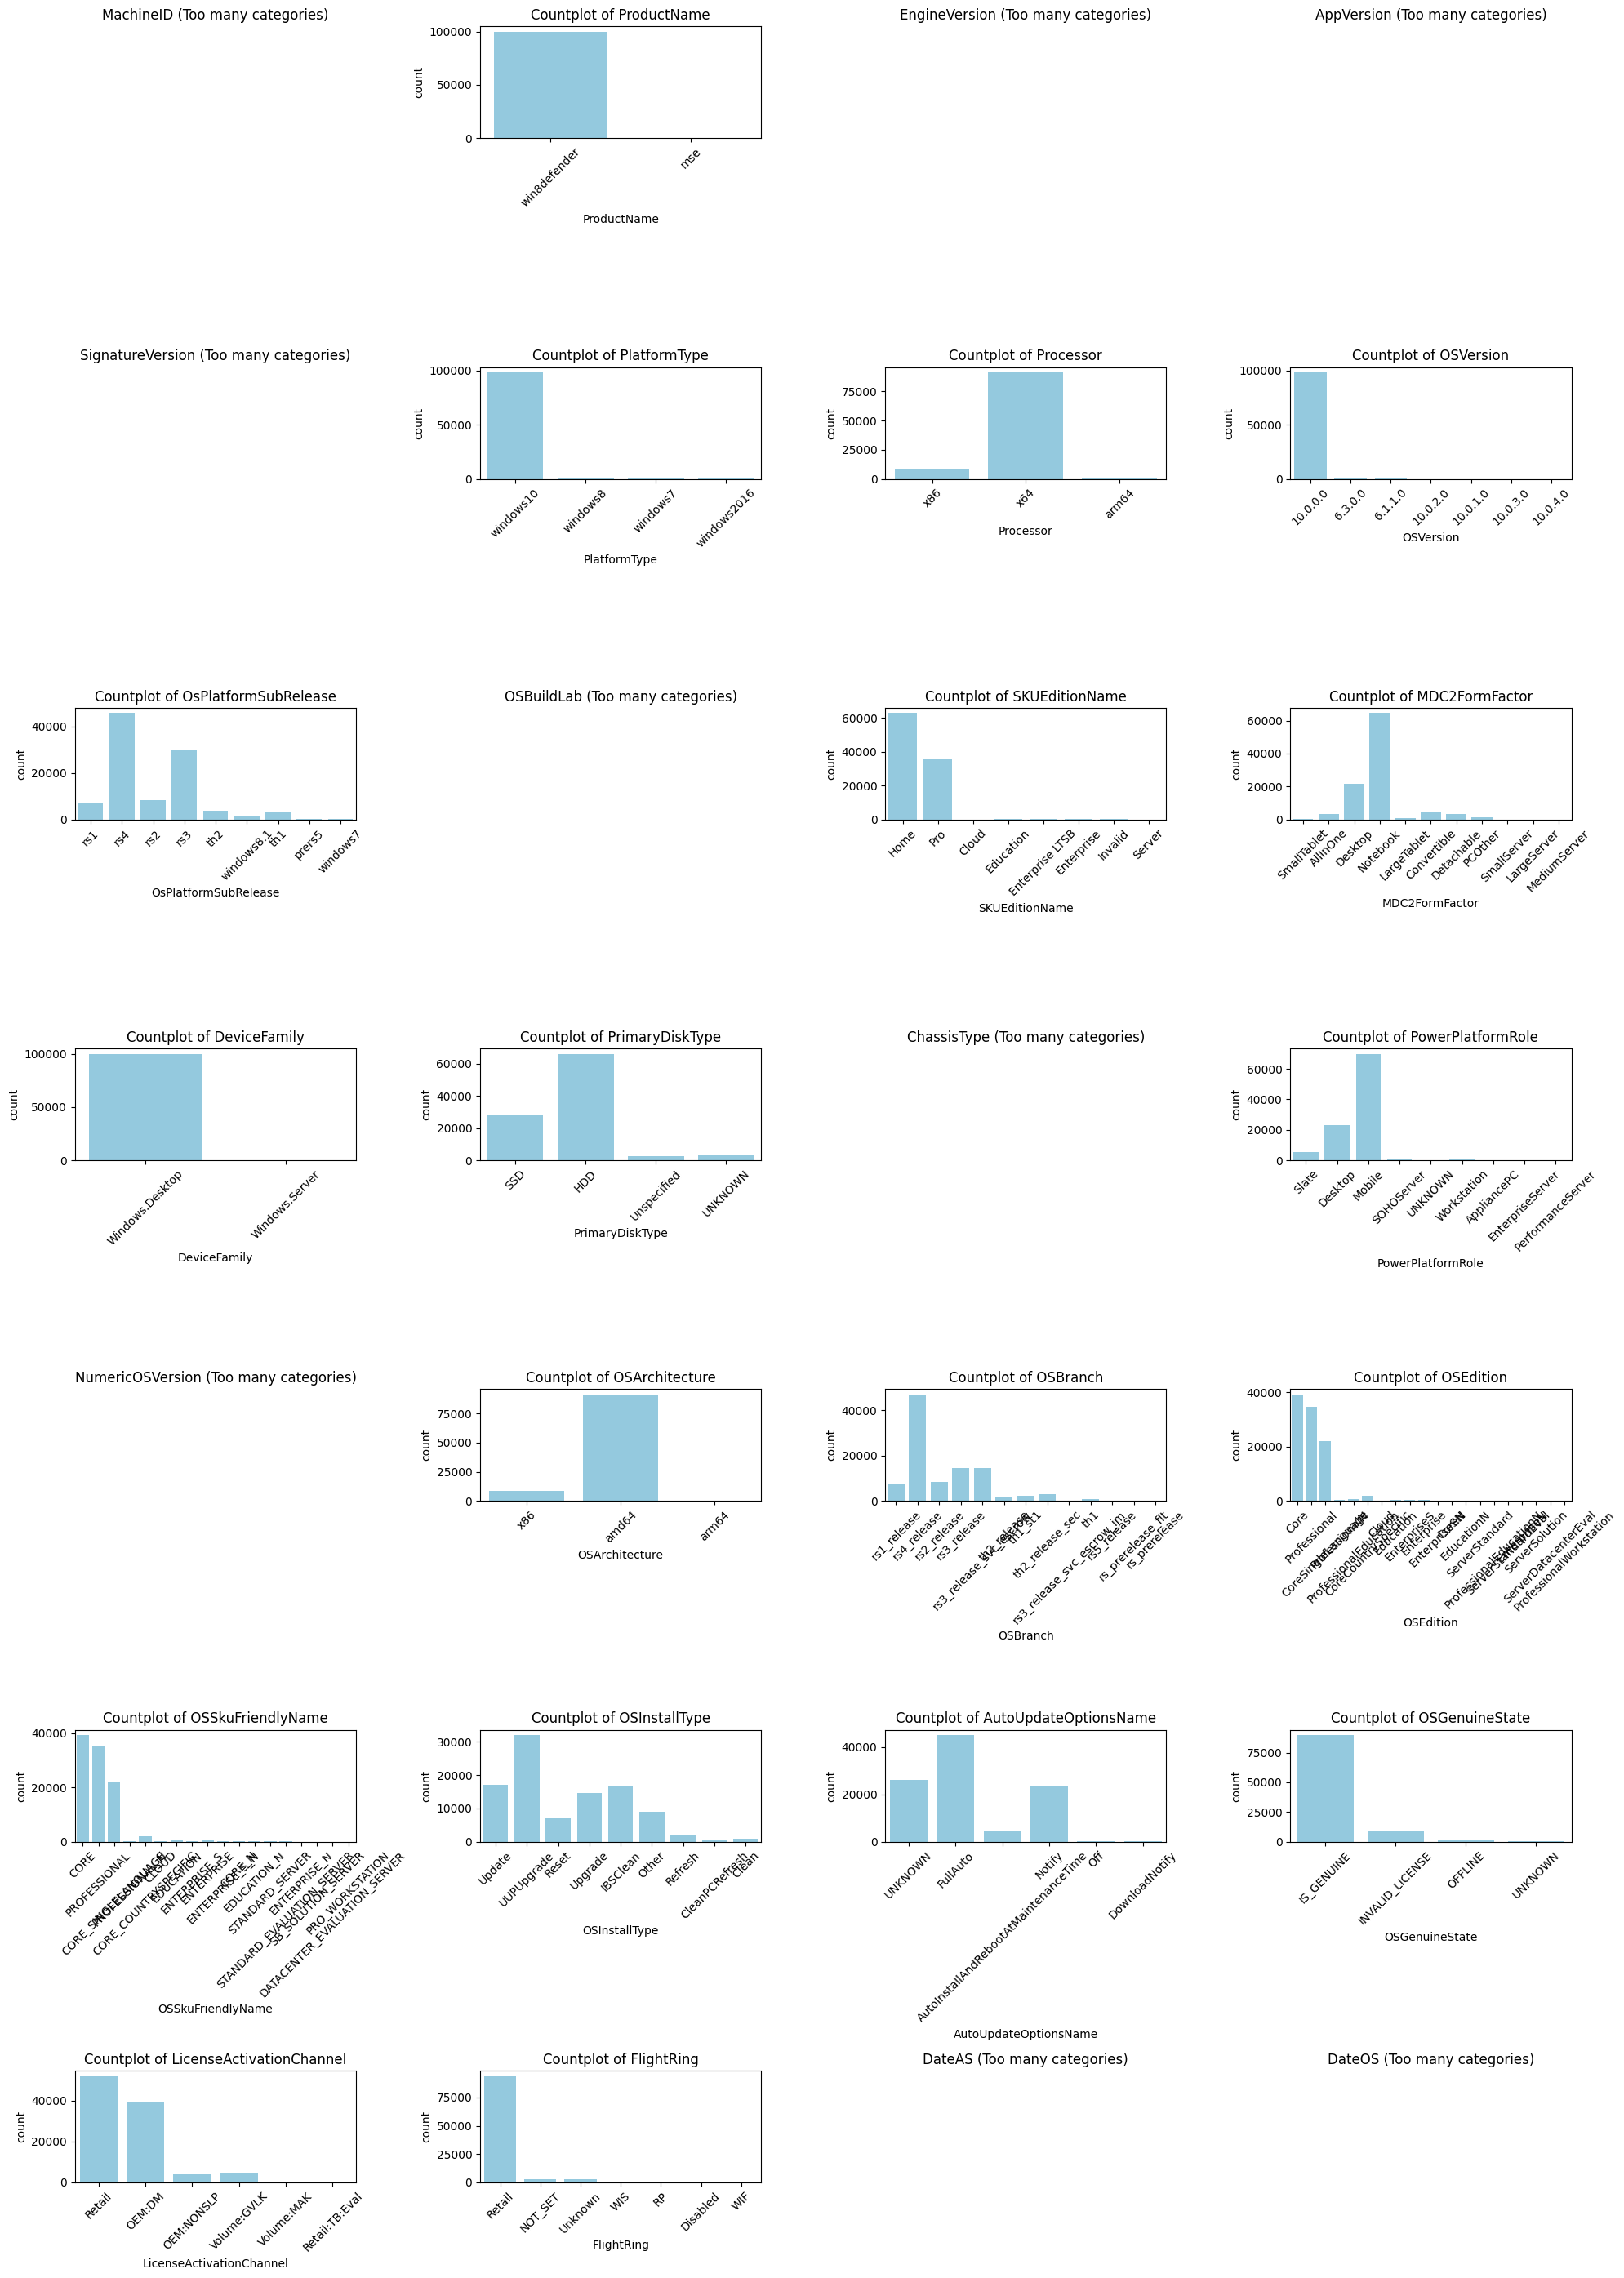

In [51]:
# Select categorical columns from the new training dataset
categorical_cols_all = train.select_dtypes(include=['object']).columns

n_cols_cat = 4
n_plots_cat = len(categorical_cols_all)
n_rows_cat = (n_plots_cat + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(n_cols_cat * 5, n_rows_cat * 4))
for i, col in enumerate(categorical_cols_all, 1):
    plt.subplot(n_rows_cat, n_cols_cat, i)
    # Limit unique values to avoid overcrowded plots
    if train[col].nunique() <= 20:
        sns.countplot(x=train[col], color='skyblue')
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col}")
    else:
        plt.axis('off')
        plt.title(f"{col} (Too many categories)")

plt.tight_layout()
plt.show()


# Interpretations from the Box Plots(Categorical) above :

* Features like Processor, DeviceFamily, PlatformType, and OSArchitecture have one dominant category (e.g., 'x64', 'Windows.Desktop').Imbalanced categories can cause models to overfit to the most common category unless handled properly.

  Best model handling : These tree-based models like LightGBM / XGBoost can handle imbalance better because they focus on split quality, not global distribution. If we use MLP / SGDClassifier it can Easily biased by frequent classes unless features are rebalanced

  

* Low-Cardinality Features (Ideal for Encoding low-cardinality = few unique values.) : FlightRing, LicenseActivationChannel, PrimaryDiskType, These have a small, balanced set of categories (2–10 values) ideal for encoding using Label Encoding (if ordinal) and One-Hot Encoding (if nominal).

  Best model handling : These features are clean and well-suited for encoding. LightGBM, Random Forest, and MLP all perform well.


* Ordinal or Structured Categories E.g., OSBranch, OSEdition, AutoUpdateOptionsName These are not purely categorical, but ordered or semantically structured Encoding these as nominal can lose valuable information, we can use Ordinal encoding to keep the necessary information intact.

* Too many categories: MachineID, EngineVersion, AppVersion, SignatureVersion, OSBuildLab, ChassisType, NumericOSVersion are termed as too many categories which on can see from above plots(a total of more than 20 features) these Are harder to visualize clearly and also easily inflate Dimensionality if one-hot encoded which May contain low-frequency or rare values, Hence i droped MachineID and (DateAS ,DateOS) feature engineered it to some other useful column in order to increase model efficiency.


   Best model handling : Avoid using one hot encoding in this, LightGbm works well in this.



# 4.7 Histogram Plot

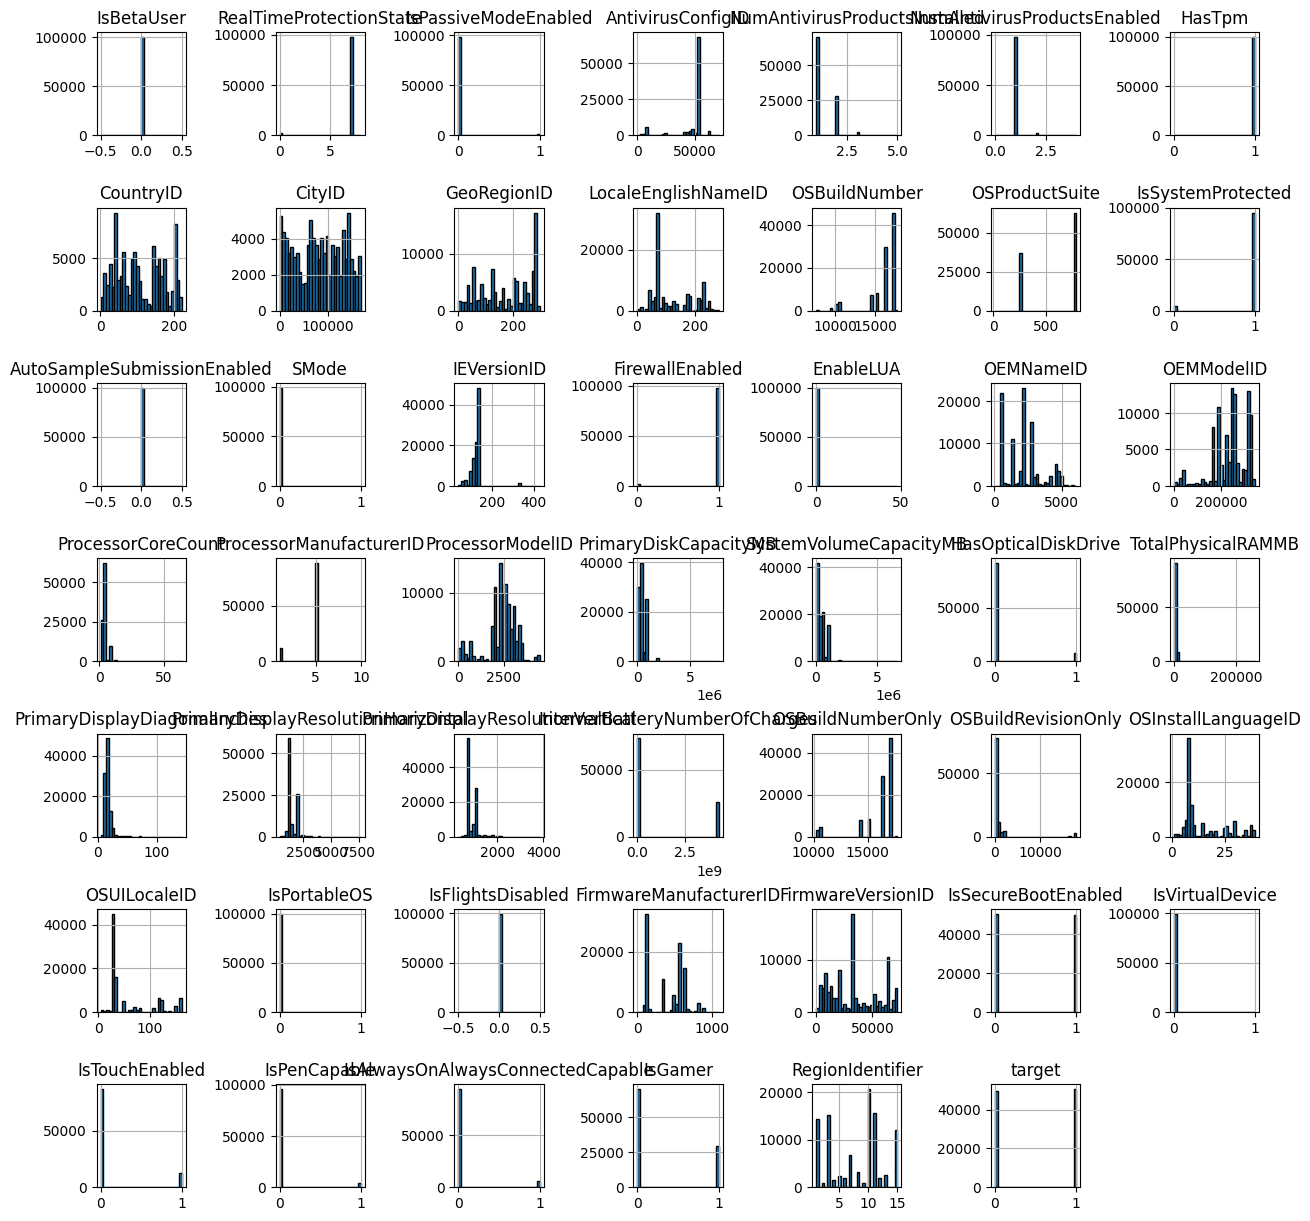

In [52]:
import matplotlib.pyplot as plt
train.hist(figsize=(15, 15), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=1)
plt.show()


# Interpretations from the Histogram Plots

* IsBetaUser, HasTpm, IsPortableOS, IsTouchEnabled, IsVirtualDevice, FirewallEnabled, IsGamer, target are heavily imbalanced in many cases. But it is Still important; imbalance does not mean no value — binary features often drive predictions when used with tree-based models. Encoding is not needed, keep it or possibly drop if constant.

*  NumAntivirusProductsInstalled, RealTimeProtectionState, OSProductSuite These have few distinct values, creating visible bars. These features are suitable for tree-based models.


* PrimaryDiskCapacityMB, SystemVolumeCapacityMB, TotalPhysicalRAMMB, InternalBatteryNumberOfCharges Many show right-skewed distribution — long tail on the right.

* CityID, OEMModelID, LocaleEnglishNameID, FirmwareVersionID look like numeric features but are categorical in nature. Also it Contain thousands of unique values. One-Hot Encoding (for tree models) can lead to high dimensionality, hence don't feed these into linear or distance-based models.



  Best model handling : Hence tree based models is best suited by observing above Histogram



# 4.8 Heatmap - Categorical Combination

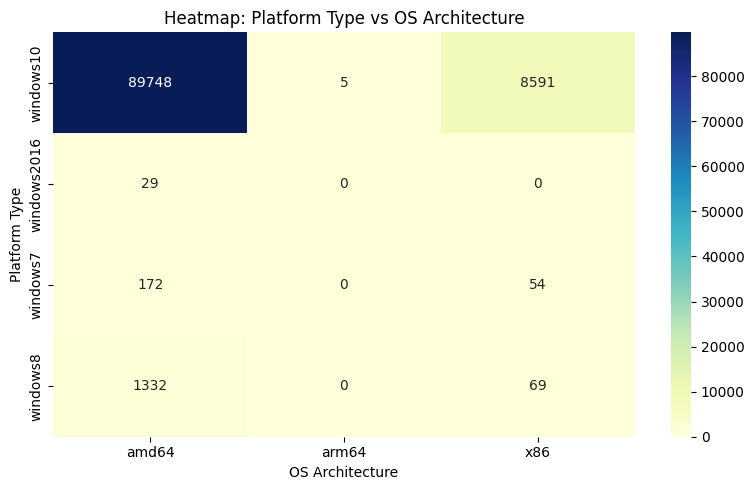

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Handle missing values (optional for visualization)
train['PlatformType'] = train['PlatformType'].fillna('Unknown')
train['OSArchitecture'] = train['OSArchitecture'].fillna('Unknown')

# Create the crosstab
crosstab = pd.crosstab(train['PlatformType'], train['OSArchitecture'])

# Plot as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap: Platform Type vs OS Architecture')
plt.xlabel('OS Architecture')
plt.ylabel('Platform Type')
plt.tight_layout()
plt.show()


# Interpretations from this Heatmap

* Although this Heatmap doen't give much information and also it is not directly related to Target variable but combining both features gives a useful insight. Here we saw 89748 counts use combination of windows 10 platform with amd64 OS architecture.


# 4.9 BarChart of Platform + OS Architecture Platform

C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\4027779145.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=infection_rate.index, y=infection_rate.values, palette='viridis')


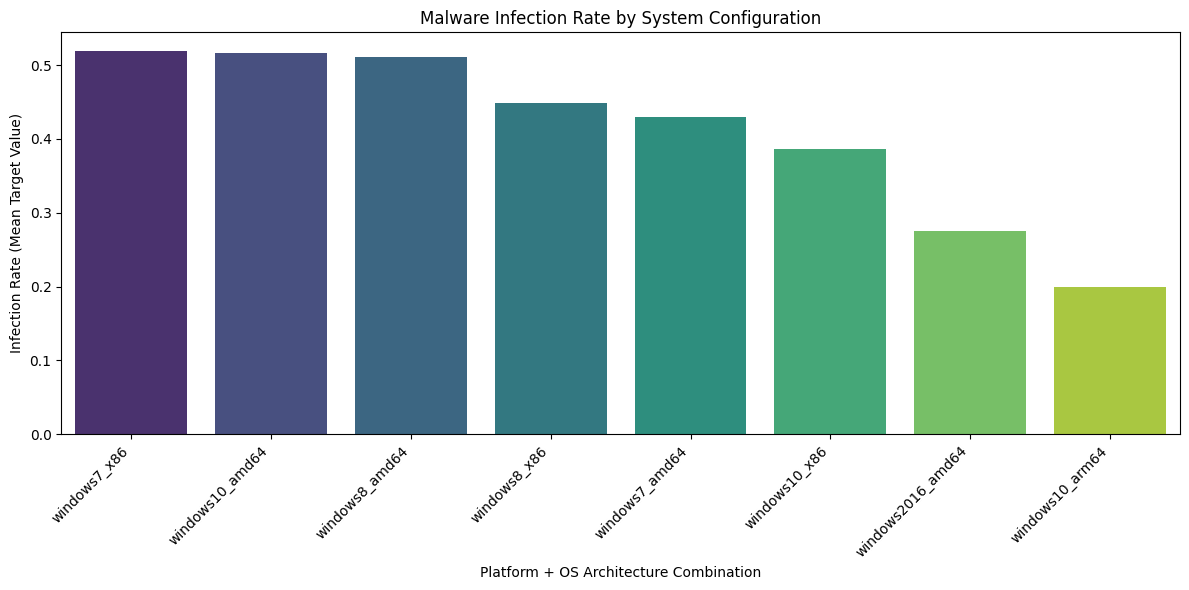

In [54]:
eda_df = train.copy()

# Create the feature only in the copied DataFrame
eda_df['Platform_OSCombo'] = eda_df['PlatformType'] + "_" + eda_df['OSArchitecture']

# Compute infection rate
infection_rate = eda_df.groupby('Platform_OSCombo')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=infection_rate.index, y=infection_rate.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Platform + OS Architecture Combination')
plt.ylabel('Infection Rate (Mean Target Value)')
plt.title('Malware Infection Rate by System Configuration')
plt.tight_layout()
plt.show()

# Interpretations from this BarChart

* Legacy or Low-End Systems Are More Vulnerable windows7_x86 has the highest infection rate (~52%) ,windows10_x86 and windows8_x86 also show relatively high infection rates.

  Interpretation: Older or 32-bit systems are likely less secure, missing updates, or using outdated security tools.


*  Newer and 64-bit Systems Are Less Vulnerable windows10_arm64 and windows2016_amd64 have the lowest infection rates (~20–27%).

  Interpretation: These systems are : Up-to-date, Enterprise-managed, Equipped with better security (firewall, secure boot, etc.)

* Even within the same platform (windows10), architecture makes a difference:

   windows10_x86 → ~39%

   windows10_amd64 → ~52%

   windows10_arm64 → ~20%
 

# 4.9 Check Balance Data

C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\3012777467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=train, palette='Set2')


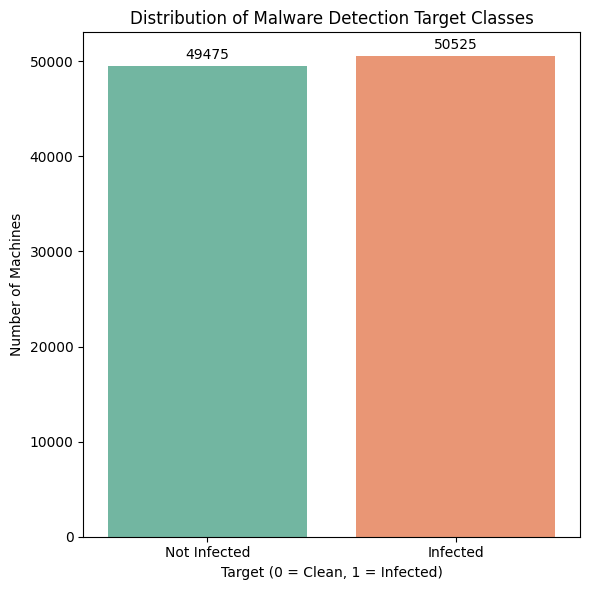

In [55]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='target', data=train, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.title('Distribution of Malware Detection Target Classes')
plt.xlabel('Target (0 = Clean, 1 = Infected)')
plt.ylabel('Number of Machines')
plt.xticks([0, 1], ['Not Infected', 'Infected'], fontsize=10)
plt.tight_layout()
plt.show()


# 4.10 Heatmap for Processor vs OS Architecture

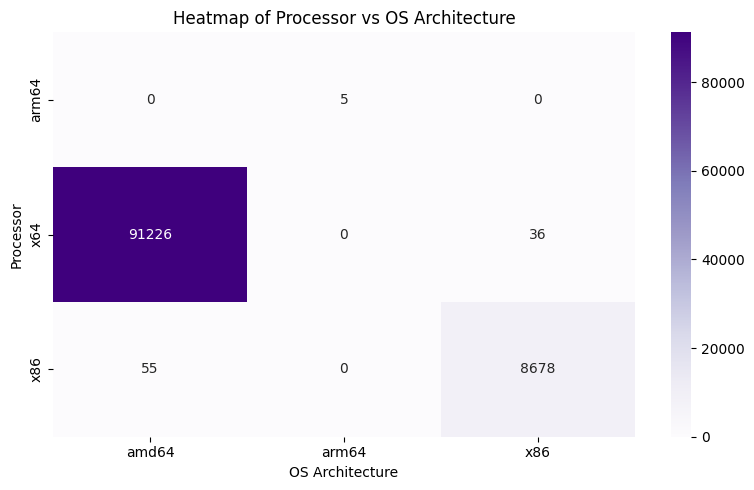

In [56]:
eda_df = train[['Processor', 'OSArchitecture']].dropna()

crosstab = pd.crosstab(eda_df['Processor'], eda_df['OSArchitecture'])

plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='Purples')
plt.title('Heatmap of Processor vs OS Architecture')
plt.xlabel('OS Architecture')
plt.ylabel('Processor')
plt.tight_layout()
plt.show()


# 4.9 BarChart of  Processor vs OS Architecture

C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\1972304193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=infection_rate.index, y=infection_rate.values, palette="coolwarm")


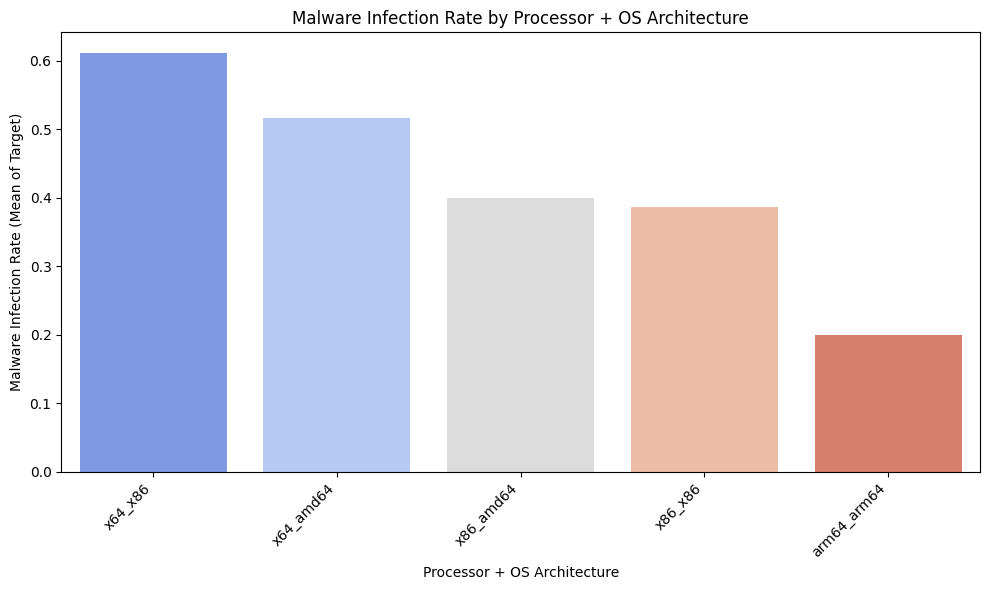

In [57]:
eda_df = train.copy()

eda_df['Processor_OSArch'] = eda_df['Processor'] + "_" + eda_df['OSArchitecture']

infection_rate = eda_df.groupby('Processor_OSArch')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=infection_rate.index, y=infection_rate.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Processor + OS Architecture')
plt.ylabel('Malware Infection Rate (Mean of Target)')
plt.title('Malware Infection Rate by Processor + OS Architecture')
plt.tight_layout()
plt.show()


# Interpretations from this BarChart

* x64_x86 has the highest malware rate (~61%) This combo likely represents 64-bit processors running 32-bit OSes. It may be more prone to compatibility issues or lack certain security features available in full 64-bit environments.

* x64_amd64 is also high (~52%) A 64-bit processor + OS architecture, but with amd64, potentially Windows systems (x64-based Windows). Suggests malware is still common despite 64-bit OS — may point to software stack vulnerabilities.

* 86_amd64 and x86_x86 are moderate (~39–40%) These might be older 32-bit machines (x86 processors or 32-bit OS). Malware rate is significant but lower than hybrid/legacy systems.

* rm64_amd64 has the lowest rate (~20%) ARM-based processors running 64-bit OSes. This combo is most secure, possibly due to: Limited use in traditional Windows PCs. Mobile OSes or devices with better app sandboxing and restrictions. Newer systems, less likely to be legacy-infected.

# 4.12 Heatmap SKUEditionName vs Target


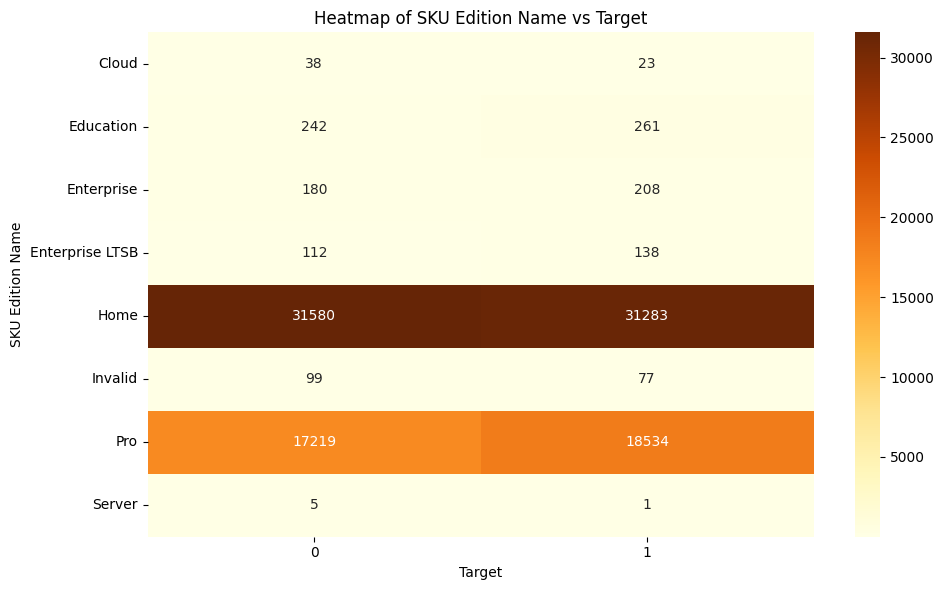

In [58]:
eda_df_2 = train[['SKUEditionName', 'target']].dropna()

crosstab_2 = pd.crosstab(eda_df_2['SKUEditionName'], eda_df_2['target'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_2, annot=True, fmt='g', cmap='YlOrBr')  # 'g' = integer formatting
plt.title('Heatmap of SKU Edition Name vs Target')
plt.xlabel('Target')
plt.ylabel('SKU Edition Name')
plt.tight_layout()
plt.show()


# Interpretations from above Heatmap

*  Home and Pro Editions Are the Most Common widely used by individual users and small businesses.

*  Enterprise and Education Editions Have Lower Counts but Higher Safety Enterprise, Enterprise LTSB, and Education show: Very low total counts But slightly higher proportion of safe machines (target = 0) These editions are typically used in corporate or academic environments with stricter IT controls and better protection.

# 4.13 Heatmap DeviceFamily vs PowerPlatformRole

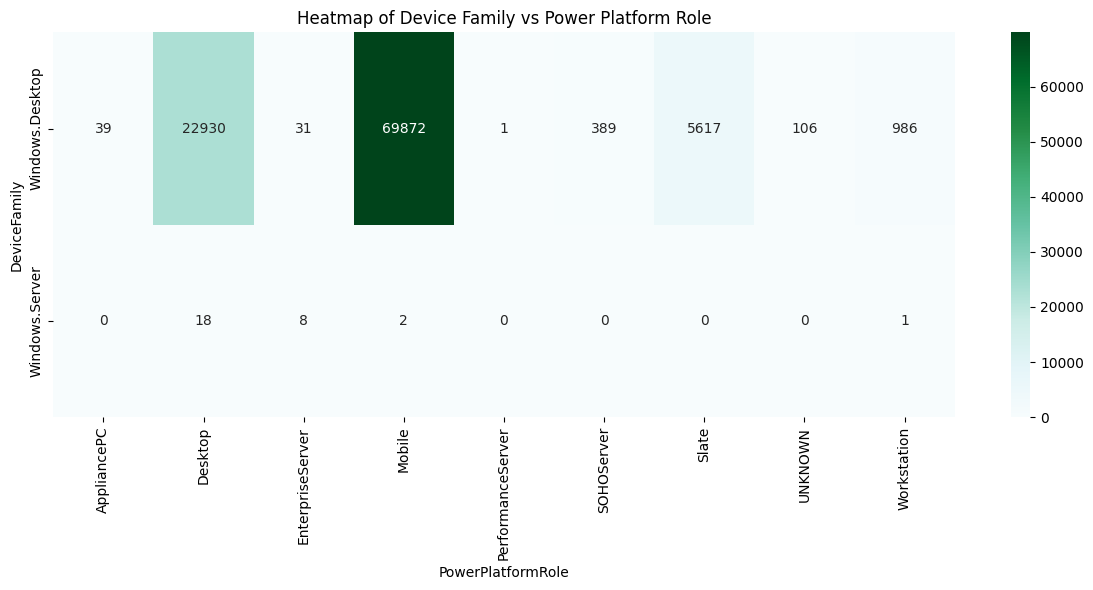

In [59]:
# Generate a heatmap for DeviceFamily vs PowerPlatformRole
eda_df_2 = train[['DeviceFamily', 'PowerPlatformRole']].dropna()
crosstab_2 = pd.crosstab(eda_df_2['DeviceFamily'], eda_df_2['PowerPlatformRole'])

plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_2, annot=True, fmt='g', cmap='BuGn')
plt.title('Heatmap of Device Family vs Power Platform Role')
plt.xlabel('PowerPlatformRole')
plt.ylabel('DeviceFamily')
plt.tight_layout()
plt.show()

# Interpretations from above Heatmap

*  Windows.Desktop dominates the dataset.It is the most common device family, as expected.Highest device counts across almost all PowerPlatformRole categories.

*  Very few entries under Windows.Server Extremely small numbers in all categories.Suggests Windows.Server is not a dominant group in this dataset.

*   Slate, Workstation, and UNKNOWN are low-frequency categories These show much lower usage or are less frequently reported. Candidates for combining into an "Other" category or for dropping (depending on model requirements).

* EnterpriseServer & PerformanceServer roles are barely used These roles show very low usage for both device families. This could indicate these are specialized configurations not relevant for mass malware analysis.

# 4.14 BarChart of DeviceFamily vs PowerPlatformRole

C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\3322382059.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=infection_rate.index, y=infection_rate.values, palette="viridis")


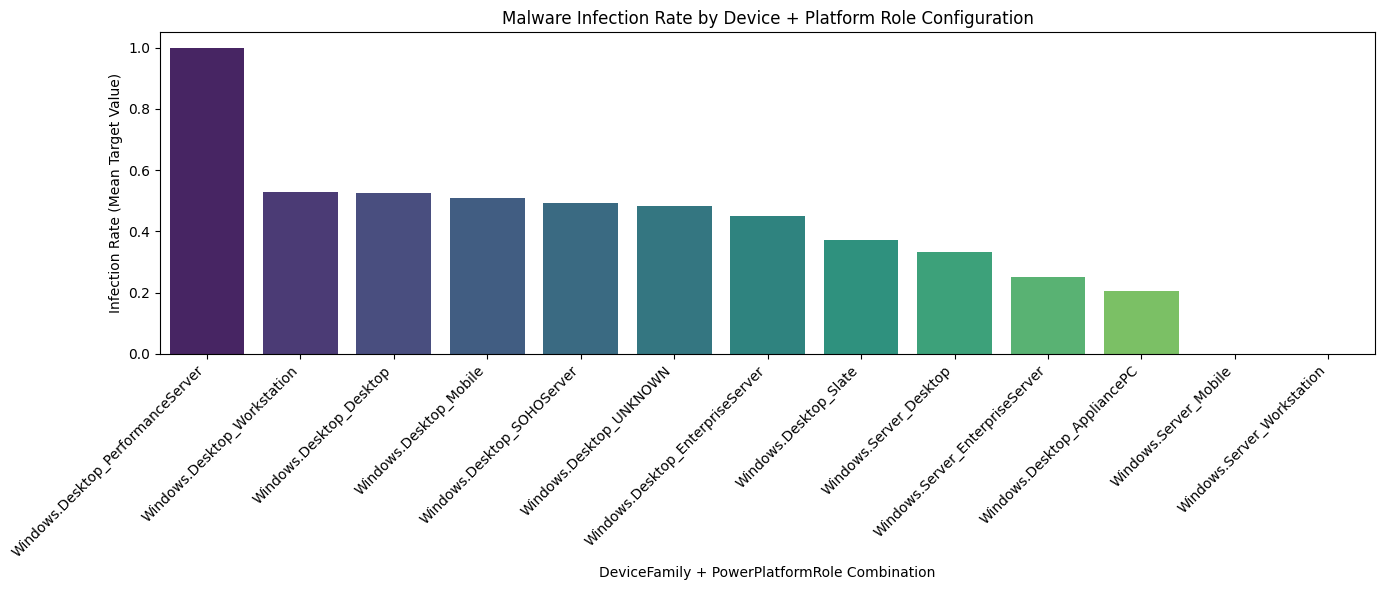

In [60]:
eda_df = train[['DeviceFamily', 'PowerPlatformRole', 'target']].dropna().copy()

eda_df['DeviceFamily_PowerRole'] = eda_df['DeviceFamily'] + "_" + eda_df['PowerPlatformRole']

infection_rate = eda_df.groupby('DeviceFamily_PowerRole')['target'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=infection_rate.index, y=infection_rate.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Infection Rate (Mean Target Value)")
plt.xlabel("DeviceFamily + PowerPlatformRole Combination")
plt.title("Malware Infection Rate by Device + Platform Role Configuration")
plt.tight_layout()
plt.show()


# Interpretations from this BarChart

* The height of each bar tells you how prone that configuration is to malware.

* Highest Risk Configuration: Windows.Desktop_PerformanceServer has the highest infection rate (≈1.0). This could indicate misconfigured or high-performance desktops are more vulnerable or targeted.

* Workstations and Desktops: Windows.Desktop_Workstation and Windows.Desktop_Desktop also have above-average infection rates (~0.53). These are likely standard personal-use machines with weaker security setups or user behavior patterns increasing risk.

* Low-Risk Configurations: Windows.Server_Mobile, Windows.Server_Workstation, and Windows.Desktop_AppliancePC show the lowest infection rates (<0.3). Suggests servers and specialized configurations tend to be more secure.

* Feature Importance Discovery: Shows that DeviceFamily and PowerPlatformRole are strong predictive features for malware.

* Tree-Based Models (e.g., Random Forest, LightGBM, XGBoost): These handle high-cardinality categorical features very well and can learn from these patterns directly. LightGBM especially excels at capturing splits in features like DeviceFamily + PowerRole.

# 4.15 KDE Plot(Kernel Density Estimation)

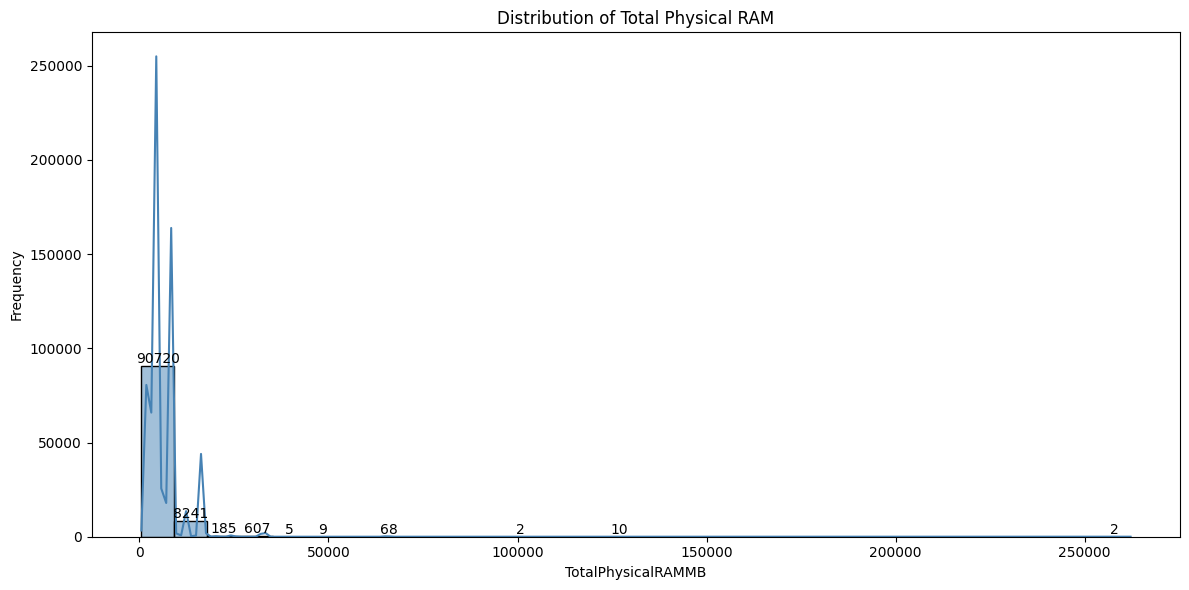

In [61]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=train, x='TotalPhysicalRAMMB', kde=True, bins=30, color='steelblue')

plt.title('Distribution of Total Physical RAM')
plt.xlabel('TotalPhysicalRAMMB')
plt.ylabel('Frequency')

# Annotate bar heights
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid cluttering annotations for very small values
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# Interpretations from this BarChart

* Highly Skewed Distribution: The distribution is right-skewed (long tail on the right). Most machines have less than 16,000 MB (~16GB) of RAM. A very small fraction of devices have extremely high RAM (e.g., >64 GB or 100,000+ MB), which could be servers or workstations.

* Common RAM Configurations: Major peaks (e.g., 8,244 systems or 90,720 systems) likely correspond to standard consumer device configurations, like:

4 GB (4096 MB)

8 GB (8192 MB)

16 GB (16384 MB)

* Presence of Outliers: A few machines show very high RAM values (100k–250k MB) — these are outliers and might affect scaling or modeling. Consider capping or transforming this feature (e.g., using log scale or normalization).


* Since data is not normally distributed, standardization might not be optimal — we may prefer MinMaxScaler or log transformation.

* Identifies hardware-based patterns in malware prediction: Lower RAM devices may have weaker defenses and outdated systems potentially higher malware risk. High RAM systems (servers) may be less vulnerable or better protected.




# Model Selection: 

* Tree-based models (LightGBM, Random Forest, XGBoost):Handle this skewness well and can learn non-linear splits.

* Linear models (SGDClassifier, Logistic Regression): May require log-transformed or scaled versions to learn effectively.

* Neural networks (MLPClassifier): Would benefit from MinMax or Standard scaling.

# 4.16 Violin Plots

C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\42722593.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=train[col], palette='Set2')
C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\42722593.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=train[col], palette='Set2')
C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\42722593.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=train[col], palette='Set2')
C:\Users\sahum\AppData\Local\Temp\ipykernel_15912\42722593.py:15: FutureWarning: 

Passing `palet

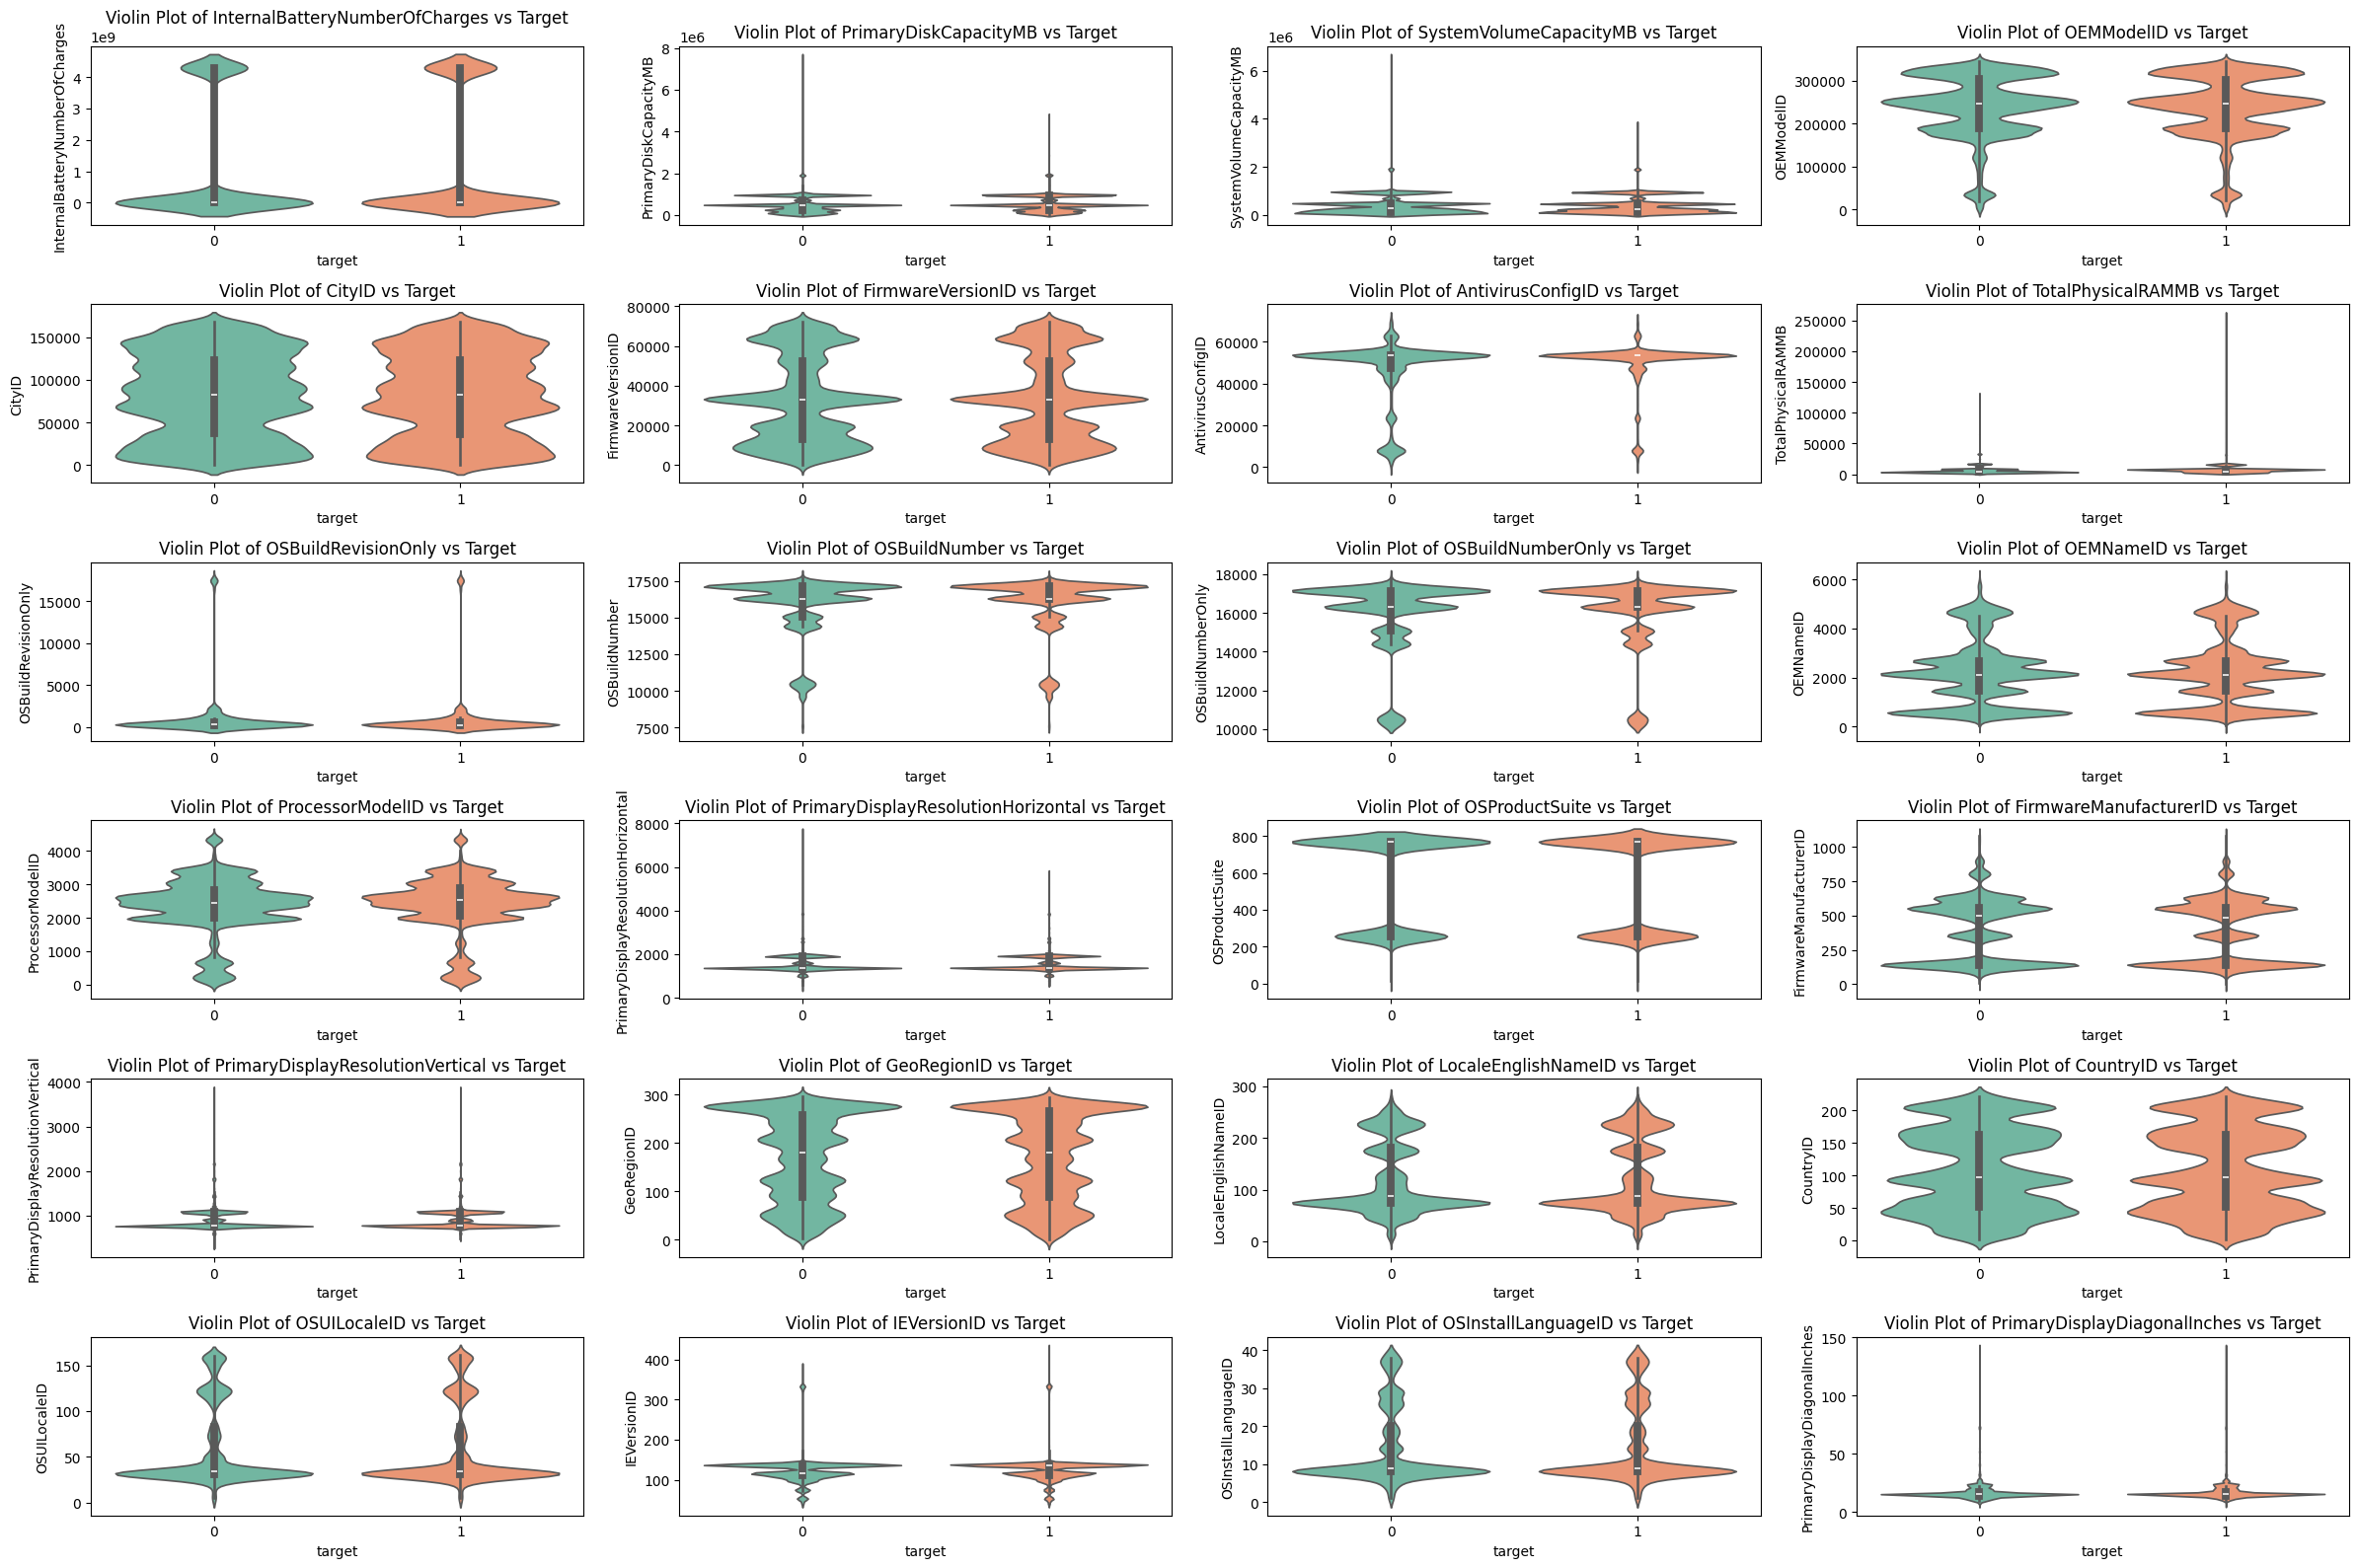

In [62]:

num_cols = train.select_dtypes(include=['int64', 'float64']).drop(columns=['target'])


top_n_more = 24
top_numeric_columns_more = num_cols.var().sort_values(ascending=False).index[:top_n_more]
num_cols_var_more = train[top_numeric_columns_more]

y = train['target']

plt.figure(figsize=(24, 16))
rows = (top_n_more + 3) // 4  # 4 plots per row

for i, col in enumerate(top_numeric_columns_more):
    plt.subplot(rows, 4, i + 1)
    sns.violinplot(x=y, y=train[col], palette='Set2')
    plt.title(f'Violin Plot of {col} vs Target')

plt.tight_layout()
plt.show()

# Interpretations from the Histogram Plots

Violin plot is Density + distribution of a numerical feature across two classes of the target, which depicts Wider areas = More data points.Also Separation between class 0 and 1 = Better discriminative power.


* SystemVolumeCapacityMB, TotalPhysicalRAMMB, ProcessorModelID, AntivirusConfigID Show different shapes/densities for target 0 vs target 1. These features are potentially strong predictors and should be prioritized in modeling.

* Features like: CountryID, GeoRegionID, CityID, OSBuildNumberOnly Shows very similar shapes for both classes. It May not contribute much in data modelling.

* InternalBatteryNumberOfCharges, PrimaryDiskCapacityMB, SystemVolumeCapacityMB, TotalPhysicalRAMMB, PrimaryDisplayResolutionHorizontal, PrimaryDisplayResolutionVertical, PrimaryDisplayDiagonalInches, OEMModelID, OSBuildRevisionOnly, FirmwareVersionID ,CityID show long tails or extreme outliers.



# 4.19 Correlationship between features

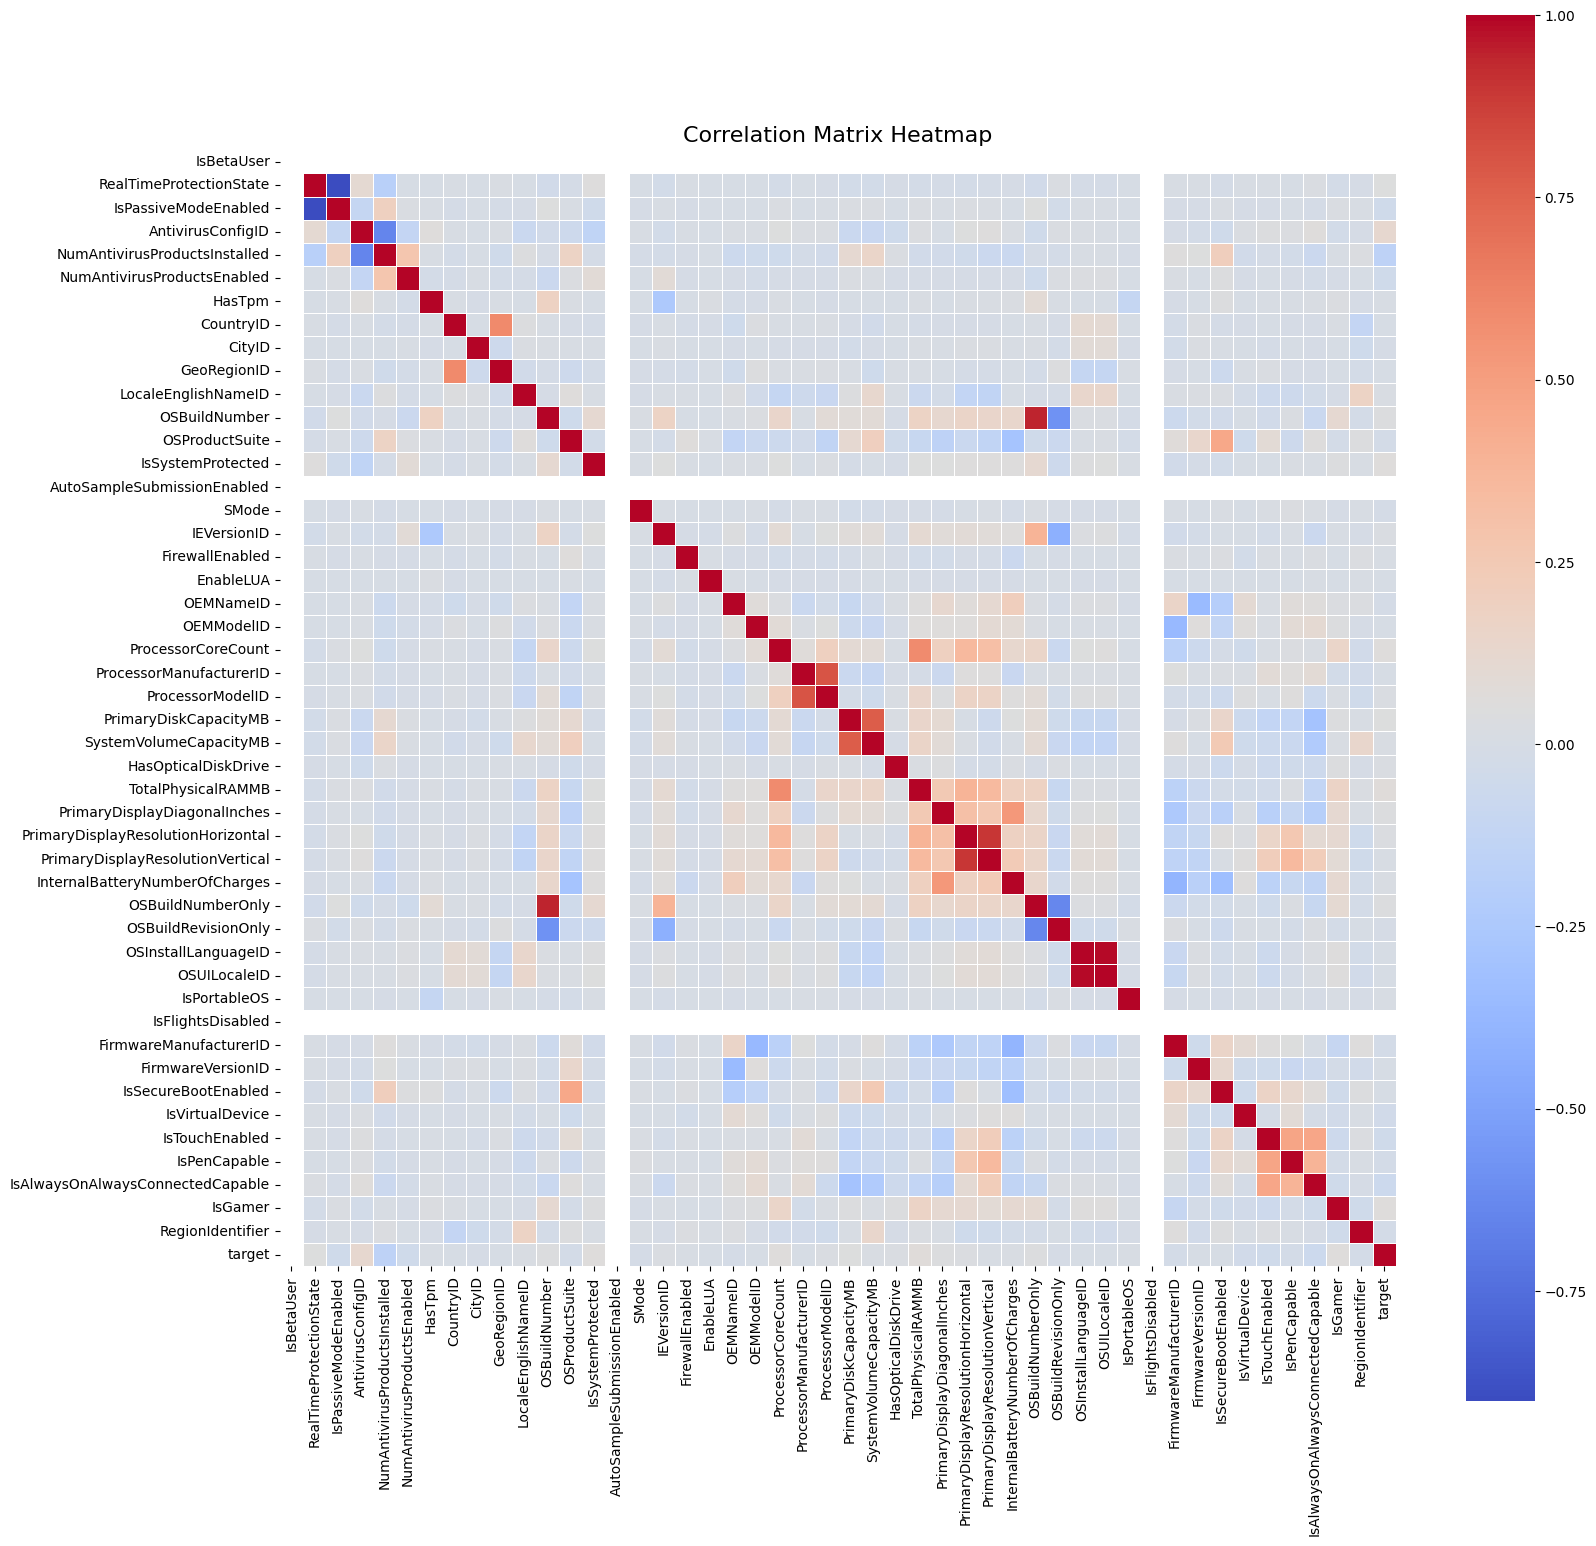

In [63]:
corr_matrix = train.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(18, 18)) 
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, square=True)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# Interpretations from Correlation Heatmap

* Strong Positive Correlations : PrimaryDiskCapacityMB <-> SystemVolumeCapacityMB: These are strongly correlated, which is expected — system volume is a part of the primary disk.

*  Weak or No Correlation with Target Variable : Features like CityID, GeoRegionID, ProcessorModelID show almost no correlation with the target (closer to 0). Doesn’t mean they’re useless — tree-based models (like LightGBM, RandomForest) can still extract signal from non-linear interactions.
But for linear models, these won’t contribute much predictive power.

* Features like IsGamer, PlatformType, or TotalPhysicalRAMMB (if included) may show low correlation, indicating: Either non-linear relationships, or
Need for categorical encoding to extract signal properly.


# 4.20 Handling Missing Data

In [64]:
train.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [65]:
train.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

# 5 Data Preprocessing : Prepare Data for ML Algorithm

# 5.1 Feature Engineering

In [66]:
train["DateAS"] = pd.to_datetime(train["DateAS"], errors="coerce")
train["DateOS"] = pd.to_datetime(train["DateOS"], errors="coerce")    #NaT cannot parse as date 
test["DateAS"] = pd.to_datetime(test["DateAS"], errors="coerce")
test["DateOS"] = pd.to_datetime(test["DateOS"], errors="coerce")

ref_date = train["DateOS"].min()

train["DaysSinceOSUpdate"] = (train["DateOS"] - ref_date).dt.days
train["DaysSinceMalwareSignature"] = (train["DateAS"] - ref_date).dt.days
test["DaysSinceOSUpdate"] = (test["DateOS"] - ref_date).dt.days
test["DaysSinceMalwareSignature"] = (test["DateAS"] - ref_date).dt.days

# 5.2 Splitting the Data into Training and Validation

In [67]:
y = train["target"]
X = train.drop(columns=["target", "MachineID", "DateAS", "DateOS"], errors="ignore")
X_test = test.drop(columns=["MachineID", "DateAS", "DateOS"], errors="ignore")

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5.3 Creating Pipeline

In [68]:

num_attribs = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_attribs = X_train.select_dtypes(include=["object"]).columns.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", MinMaxScaler()) 
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  
])

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)
X_validation_transformed = preprocess_pipeline.transform(X_validation)

X_test_transformed = preprocess_pipeline.transform(X_test)

num_feature_names = num_attribs
cat_feature_names = list(preprocess_pipeline.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_attribs))
all_feature_names = num_feature_names + cat_feature_names

X_train_transformed = pd.DataFrame(X_train_transformed, columns=all_feature_names)
X_validation_transformed = pd.DataFrame(X_validation_transformed, columns=all_feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_feature_names)

for col in X_train_transformed.columns:
    if col not in X_test_transformed.columns:
        X_test_transformed[col] = 0 

X_test_transformed = X_test_transformed[X_train_transformed.columns]



# 5.4 Determining Shape of Training, Validation and Testing Data

In [88]:
print("X_train Shape:", X_train_transformed.shape)
print("X_validation Shape:", X_validation_transformed.shape)
print("X_test Shape:", X_test_transformed.shape)
print("y_train Shape:", y_train.shape)
print("y_validation Shape:", y_validation.shape)

# X_train Shape: (80000, 3394)
# X_validation Shape: (20000, 3394)
# X_test Shape: (10000, 3394)
# y_train Shape: (80000,)
# y_validation Shape: (20000,)


X_train Shape: (80000, 3394)
X_validation Shape: (20000, 3394)
X_test Shape: (10000, 3394)
y_train Shape: (80000,)
y_validation Shape: (20000,)


# 6 Applying PCA : Dimensionality Reduction Method

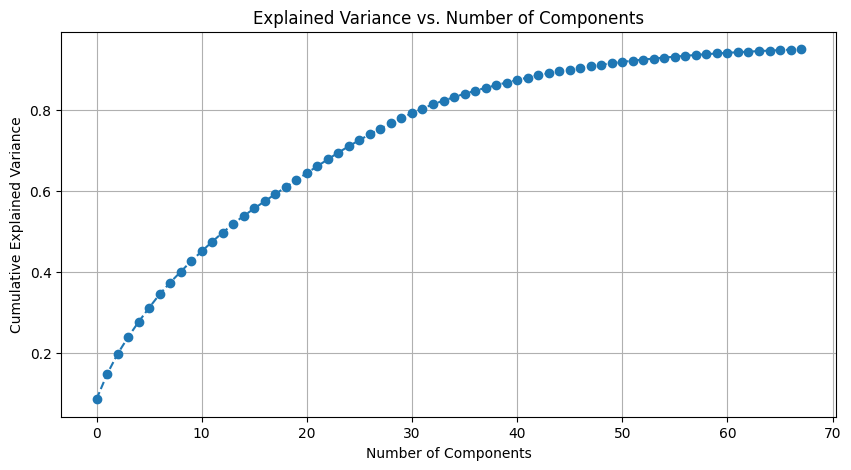

68

In [70]:
from sklearn.decomposition import PCA

num_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()

preprocess_pipeline = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())  
    ]), num_features),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),  
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  
    ]), cat_features)
])

X_transformed = preprocess_pipeline.fit_transform(X_train)

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_transformed)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

num_components = X_pca.shape[1]
num_components


# Check whether Polynomial Transformation is necessary or not, ideal if it is less than 0.5

In [89]:
if not isinstance(X_train, pd.DataFrame):
    X_train_dense = pd.DataFrame.sparse.from_spmatrix(X_train)
else:
    X_train_dense = X_train

X_numeric = X_train_dense.select_dtypes(include=[np.number])

y_numeric = pd.to_numeric(y_train, errors='coerce')

correlations = np.abs(X_numeric.corrwith(y_numeric))

top_features = correlations.sort_values(ascending=False).head(10)
print(top_features)

# NumAntivirusProductsInstalled       0.150463
# AntivirusConfigID                   0.118335
# IsAlwaysOnAlwaysConnectedCapable    0.068618
# TotalPhysicalRAMMB                  0.066729
# IsSystemProtected                   0.061905
# IsGamer                             0.060661
# ProcessorCoreCount                  0.058058
# PrimaryDiskCapacityMB               0.052289
# IsTouchEnabled                      0.049557
# RealTimeProtectionState             0.049078
# dtype: float64


NumAntivirusProductsInstalled       0.150463
AntivirusConfigID                   0.118335
IsAlwaysOnAlwaysConnectedCapable    0.068618
TotalPhysicalRAMMB                  0.066729
IsSystemProtected                   0.061905
IsGamer                             0.060661
ProcessorCoreCount                  0.058058
PrimaryDiskCapacityMB               0.052289
IsTouchEnabled                      0.049557
RealTimeProtectionState             0.049078
dtype: float64


C:\Users\sahum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sahum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


***Hence polynomial transformation is not required at all***

# 7.1 Random Forest Classifier

In [90]:

# rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
# rf_model.fit(X_train_transformed, y_train)

# y_pred_validation = rf_model.predict(X_validation_transformed)
# validation_accuracy = accuracy_score(y_validation, y_pred_validation)

# y_pred_test = rf_model.predict(X_test_transformed)

# print("Random Forest Model Performance:")
# print(f"Validation Accuracy: {validation_accuracy:.4f}")

# #Create Submission File
# submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_pred_test})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")



#  # X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv") 
# # y_pred=model.predict(X_test)
 
# # submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_pred_test})
# # submission.to_csv('submission.csv',index=False)



# # Random Forest Model Performance:
# # Validation Accuracy: 0.6111
# # Test predictions saved as 'submission.csv'.

# 7.1.1 Random Forest with Hyperparameter tuning.

In [91]:
# param_grid_rf = {
#     "n_estimators": [50, 100, 200],  
#     "max_depth": [10, 20, None],  
#     "min_samples_split": [2, 5],  
#     "min_samples_leaf": [1, 2],  
#     "bootstrap": [True],  
#     "warm_start": [True]  
# }

# rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# #Perform Randomized Search for best parameters
# grid_search_rf = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_grid_rf,
#     n_iter=5,  
#     cv=2,  # Reduce cross-validation folds
#     scoring="accuracy",
#     n_jobs=-1,  
#     verbose=1,  
#     random_state=42
# )

# grid_search_rf.fit(X_train_transformed, y_train)

# best_params_rf = grid_search_rf.best_params_
# best_accuracy_rf = grid_search_rf.best_score_

# print("Best Parameters for Random Forest:", best_params_rf)
# print(f"Best Cross-Validation Accuracy: {best_accuracy_rf:.4f}")

# rf_best_model = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
# rf_best_model.fit(X_train_transformed, y_train)

# y_pred_validation = rf_best_model.predict(X_validation_transformed)
# validation_accuracy = accuracy_score(y_validation, y_pred_validation)
# print(f"Validation Accuracy: {validation_accuracy:.4f}")

# y_pred_test = rf_best_model.predict(X_test_transformed)

# #Create Submission File
# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# # Best Parameters for Random Forest: {'warm_start': True, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
# # Best Cross-Validation Accuracy: 0.6169
# # Validation Accuracy: 0.6241
# # Test predictions saved as 'submission_rf_tuned_fast.csv'.

# 7.2 XGBoost Classifier

In [92]:
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
# xgb_model.fit(X_train_transformed, y_train)

# y_pred_validation_xgb = xgb_model.predict(X_validation_transformed)
# validation_accuracy_xgb = accuracy_score(y_validation, y_pred_validation_xgb)

# print(f"XGBoost Validation Accuracy (Without Tuning): {validation_accuracy_xgb:.4f}")

# #Make Predictions on Test Set
# y_pred_test_xgb = xgb_model.predict(X_test_transformed)

# #Create Submission File
# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_xgb})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# # XGBoost Validation Accuracy (Without Tuning): 0.6206
# # Test predictions saved as 'submission.csv'.

# 7.2.1 XGBoost with Hyperparameter Tunning.

In [93]:
# param_grid_xgb = {
#     "n_estimators": [100, 200, 300],  
#     "max_depth": [4, 6, 8],  
#     "learning_rate": [0.05, 0.1, 0.2],  
#     "subsample": [0.7, 0.8, 1.0],  
#     "colsample_bytree": [0.7, 0.8, 1.0],  
#     "min_child_weight": [1, 3, 5]  
# }

# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# grid_search_xgb = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid_xgb,
#     n_iter=10,  
#     cv=3,  
#     scoring="accuracy",
#     n_jobs=-1,  
#     verbose=1,
#     random_state=42
# )

# grid_search_xgb.fit(X_train_transformed, y_train)

# #Get best parameters & best score
# best_params_xgb = grid_search_xgb.best_params_
# best_accuracy_xgb = grid_search_xgb.best_score_

# print(f"Best Parameters for XGBoost: {best_params_xgb}")
# print(f"Best Cross-Validation Accuracy: {best_accuracy_xgb:.4f}")

# xgb_best_model = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric="logloss", random_state=42)
# xgb_best_model.fit(X_train_transformed, y_train)

# y_pred_validation_xgb = xgb_best_model.predict(X_validation_transformed)
# validation_accuracy_xgb = accuracy_score(y_validation, y_pred_validation_xgb)

# print(f"XGBoost Validation Accuracy (Optimized): {validation_accuracy_xgb:.4f}")

# y_pred_test_xgb = xgb_best_model.predict(X_test_transformed)

# #Create Submission File
# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_xgb})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# Best Parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
# Best Cross-Validation Accuracy: 0.6244
# XGBoost Validation Accuracy (Optimized): 0.6242
# Test predictions saved as 'submission.csv'.

# 7.2.2 XGBoost Classifier with Fine Tunning.

In [76]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score


# xgb_model_advanced = XGBClassifier(
#     n_estimators=500, 
#     max_depth=8, 
#     learning_rate=0.05,  
#     min_child_weight=2,  
#     subsample=0.85,  
#     colsample_bytree=0.9,  
#     gamma=0.1,  
#     reg_lambda=2, 
#     reg_alpha=0.5,  
#     random_state=42,
#     use_label_encoder=False,  
#     eval_metric="logloss"
# )
# xgb_model_advanced.fit(
#     X_train_transformed, y_train,
#     eval_set=[(X_validation_transformed, y_validation)],  
#     early_stopping_rounds=30,  
#     verbose=50  
# )


# y_pred_xgb_advanced = xgb_model_advanced.predict(X_validation_transformed)
# validation_accuracy_xgb_advanced = accuracy_score(y_validation, y_pred_xgb_advanced)

# print(f"Advanced XGBoost Validation Accuracy: {validation_accuracy_xgb_advanced:.4f}")


# y_pred_test_xgb_advanced = xgb_model_advanced.predict(X_test_transformed)

# #Create Submission File
# submission= pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_xgb_advanced})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# # [0]	validation_0-logloss:0.68972
# # [50]	validation_0-logloss:0.64862
# # [100]	validation_0-logloss:0.64402
# # [150]	validation_0-logloss:0.64291
# # [200]	validation_0-logloss:0.64246
# # [250]	validation_0-logloss:0.64211
# # [300]	validation_0-logloss:0.64173
# # [346]	validation_0-logloss:0.64153
# # Advanced XGBoost Validation Accuracy: 0.6298


# 7.3 SGD Classifier

In [77]:

# sgd_model = SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
# sgd_model.fit(X_train_transformed, y_train)

# y_pred_validation_sgd = sgd_model.predict(X_validation_transformed)
# validation_accuracy_sgd = accuracy_score(y_validation, y_pred_validation_sgd)

# print(f"SGDClassifier Validation Accuracy: {validation_accuracy_sgd:.4f}")
# y_pred_test_sgd = sgd_model.predict(X_test_transformed)

# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_sgd})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# # SGDClassifier Validation Accuracy: 0.6010
# # Test predictions saved as 'submission.csv'.

# 7.3.1 SGD Classifier with Hyperparameter Tunning. 

In [78]:
# param_grid_sgd = {
#     "loss": ["log_loss", "hinge", "modified_huber"],  
#     "alpha": [0.0001, 0.001, 0.01, 0.1],  
#     "penalty": ["l1", "l2", "elasticnet"],  
#     "learning_rate": ["optimal", "adaptive"], 
#     "eta0": [0.001, 0.01, 0.1]  

# sgd_model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# grid_search_sgd = RandomizedSearchCV(
#     estimator=sgd_model,
#     param_distributions=param_grid_sgd,
#     n_iter=10,  # Try 10 random combinations
#     cv=3,  # 3-fold cross-validation
#     scoring="accuracy",
#     n_jobs=-1,  # Use all CPU cores
#     verbose=2,
#     random_state=42
# )

# grid_search_sgd.fit(X_train_transformed, y_train)

# best_params_sgd = grid_search_sgd.best_params_
# best_accuracy_sgd = grid_search_sgd.best_score_

# print(f"Best Parameters for SGD: {best_params_sgd}")
# print(f"Best Cross-Validation Accuracy: {best_accuracy_sgd:.4f}")

# sgd_best = SGDClassifier(**best_params_sgd, random_state=42)
# sgd_best.fit(X_train_transformed, y_train)

# y_pred_validation_sgd = sgd_best.predict(X_validation_transformed)
# validation_accuracy_sgd = accuracy_score(y_validation, y_pred_validation_sgd)

# print(f"Fine-Tuned SGDClassifier Validation Accuracy: {validation_accuracy_sgd:.4f}")

# y_pred_test_sgd = sgd_best.predict(X_test_transformed)

# #Create Submission File
# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_sgd})
# submission.to_csv("submission.csv", index=False)
# print("Test predictions saved as 'submission.csv'.")


# # Best Parameters for SGD: {'penalty': 'l2', 'loss': 'log_loss', 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 0.001}
# # Best Cross-Validation Accuracy: 0.6105
# # Fine-Tuned SGDClassifier Validation Accuracy: 0.6136


# 7.4 MultiLayer Perceptron

In [79]:
# num_attribs = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
# cat_attribs = X_train.select_dtypes(include=["object"]).columns.tolist()

# num_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="median")),
#     ("scaler", StandardScaler())
# ])

# cat_pipeline = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("encoder", OneHotEncoder(handle_unknown="ignore"))
# ])

# preprocess_pipeline = ColumnTransformer([
#     ("num", num_pipeline, num_attribs),
#     ("cat", cat_pipeline, cat_attribs)
# ])

# X_train_transformed = preprocess_pipeline.fit_transform(X_train)
# X_validation_transformed = preprocess_pipeline.transform(X_validation)

# mlp_model = MLPClassifier(
#     hidden_layer_sizes=(128, 64),  # Smaller network
#     activation="relu",
#     solver="adam",  # Faster optimizer
#     max_iter=200,  # Reduce training time
#     alpha=0.0001,  # Regularization
#     early_stopping=True,  # Prevent overfitting
#     random_state=42
# )

# mlp_model.fit(X_train_transformed, y_train)
# y_pred_mlp = mlp_model.predict(X_validation_transformed)
# print("Optimized MLP Accuracy:", accuracy_score(y_validation, y_pred_mlp))

# # Optimized MLP Accuracy: 0.61935


# 7.5 LightGBM Model

In [94]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import re


def clean_feature_names(df):
    df.columns = [re.sub(r"[^A-Za-z0-9_]+", "_", col) for col in df.columns]
    return df

X_train_transformed = clean_feature_names(pd.DataFrame(X_train_transformed))
X_validation_transformed = clean_feature_names(pd.DataFrame(X_validation_transformed))
X_test_transformed = clean_feature_names(pd.DataFrame(X_test_transformed))

lgb_model = LGBMClassifier(random_state=42)

lgb_model.fit(X_train_transformed, y_train)

y_pred_validation_lgb = lgb_model.predict(X_validation_transformed)
validation_accuracy_lgb = accuracy_score(y_validation, y_pred_validation_lgb)

print(f"LightGBM Validation Accuracy (Without Tuning): {validation_accuracy_lgb:.4f}")

y_pred_test_lgb = lgb_model.predict(X_test_transformed)

# Create Submission File
submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_lgb})
submission.to_csv("submission.csv", index=False)
print("Test predictions saved as 'submission.csv'.")


# [LightGBM] [Info] Number of positive: 40403, number of negative: 39597
# [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033201 seconds.
# You can set `force_row_wise=true` to remove the overhead.
# And if memory is not enough, you can set `force_col_wise=true`.
# [LightGBM] [Info] Total Bins 6454
# [LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1330
# [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
# [LightGBM] [Info] Start training from score 0.020151
# LightGBM Validation Accuracy (Without Tuning): 0.6300
# Test predictions saved as 'submission.csv'.

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6454
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1330
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
LightGBM Validation Accuracy (Without Tuning): 0.6300
Test predictions saved as 'submission.csv'.
LightGBM Validation Accuracy (Without Tuning): 0.6300
Test predictions saved as 'submission.csv'.


# 7.5.1 LightGBM with HyperParameterTuning

In [95]:
# def clean_feature_names(df):
#     df.columns = [re.sub(r"[^A-Za-z0-9_]+", "_", col) for col in df.columns]
#     return df

# X_train_transformed = clean_feature_names(pd.DataFrame(X_train_transformed))
# X_validation_transformed = clean_feature_names(pd.DataFrame(X_validation_transformed))
# X_test_transformed = clean_feature_names(pd.DataFrame(X_test_transformed))

# param_grid_lgb = {
#     "n_estimators": [200, 500, 700],
#     "max_depth": [6, 8, 10, None],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "num_leaves": [20, 31, 40, 50],
#     "subsample": [0.8, 1.0],
#     "colsample_bytree": [0.8, 1.0]
# }

# lgb_model = LGBMClassifier(random_state=42)

# grid_search_lgb = RandomizedSearchCV(
#     estimator=lgb_model,
#     param_distributions=param_grid_lgb,
#     n_iter=10,  # Limits number of searches for efficiency
#     cv=3,  # 3-fold cross-validation
#     scoring="accuracy",
#     n_jobs=-1,  # Use all CPU cores
#     verbose=1,
#     random_state=42
# )

# grid_search_lgb.fit(X_train_transformed, y_train)

# best_params_lgb = grid_search_lgb.best_params_
# best_accuracy_lgb = grid_search_lgb.best_score_

# print(f"Best Parameters for LightGBM: {best_params_lgb}")
# print(f"Best Cross-Validation Accuracy: {best_accuracy_lgb:.4f}")

# lgb_model_tuned = LGBMClassifier(**best_params_lgb, random_state=42)
# lgb_model_tuned.fit(X_train_transformed, y_train)

# y_pred_validation_lgb_tuned = lgb_model_tuned.predict(X_validation_transformed)
# validation_accuracy_lgb_tuned = accuracy_score(y_validation, y_pred_validation_lgb_tuned)

# print(f"Fine-Tuned LightGBM Validation Accuracy: {validation_accuracy_lgb_tuned:.4f}")

# y_pred_test_lgb_tuned = lgb_model_tuned.predict(X_test_transformed)

# submission = pd.DataFrame({"id": range(0, X_test.shape[0]), "target": y_pred_test_lgb_tuned})
# submission.to_csv("submission.csv", index=False)

# print("Test predictions saved as 'submission.csv'.")


# # Fitting 3 folds for each of 10 candidates, totalling 30 fits
# # [LightGBM] [Info] Number of positive: 40403, number of negative: 39597
# # [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029310 seconds.
# # You can set `force_row_wise=true` to remove the overhead.
# # And if memory is not enough, you can set `force_col_wise=true`.
# # [LightGBM] [Info] Total Bins 6454
# # [LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1330
# # [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
# # [LightGBM] [Info] Start training from score 0.020151
# # Best Parameters for LightGBM: {'subsample': 0.8, 'num_leaves': 40, 'n_estimators': 700, 'max_depth': None, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
# # Best Cross-Validation Accuracy: 0.6256
# # [LightGBM] [Info] Number of positive: 40403, number of negative: 39597
# # [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029095 seconds.
# # You can set `force_row_wise=true` to remove the overhead.
# # And if memory is not enough, you can set `force_col_wise=true`.
# # [LightGBM] [Info] Total Bins 6454
# # [LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 1330
# # [LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
# # [LightGBM] [Info] Start training from score 0.020151
# # Fine-Tuned LightGBM Validation Accuracy: 0.6283
# # Test predictions saved as 'submission.csv'.

# 8 ConfusionMatrixDisplay

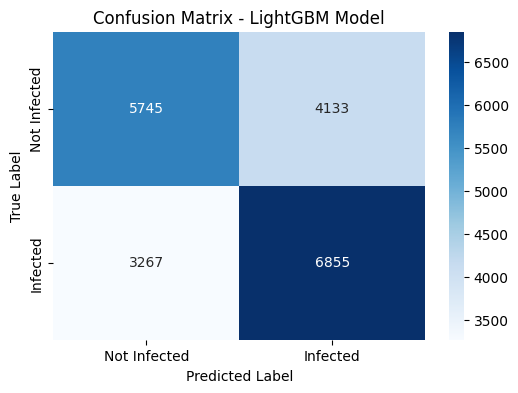

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_validation_lgb = lgb_model.predict(X_validation_transformed)
cm = confusion_matrix(y_validation, y_pred_validation_lgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Infected", "Infected"], yticklabels=["Not Infected", "Infected"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM Model")
plt.show()


# Classification Report

In [97]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_validation, y_pred_validation_lgb, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

print(classification_df)

              precision    recall  f1-score   support
0              0.637483  0.581595  0.608258   9878.00
1              0.623862  0.677238  0.649455  10122.00
accuracy       0.630000  0.630000  0.630000      0.63
macro avg      0.630673  0.629417  0.628857  20000.00
weighted avg   0.630590  0.630000  0.629108  20000.00


# Submissions

In [99]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,target
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [100]:
submission.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


# Whether Feature Engineering Performs well?

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


# Fill missing values for relevant columns
train["PlatformType"] = train["PlatformType"].fillna("Unknown")
train["OSArchitecture"] = train["OSArchitecture"].fillna("Unknown")
train["Processor"] = train["Processor"].fillna("Unknown")

# Create engineered features
train["Platform_OSCombo"] = train["PlatformType"] + "_" + train["OSArchitecture"]
train["Processor_OSArch"] = train["Processor"] + "_" + train["OSArchitecture"]

# Define original features (without combos)
base_features = ["PlatformType", "OSArchitecture", "Processor"]
engineered_features = base_features + ["Platform_OSCombo", "Processor_OSArch"]

# Encode categorical features using one-hot encoding
X_base = pd.get_dummies(train[base_features])
X_eng = pd.get_dummies(train[engineered_features])
y = train["target"]

# Split the data
Xb_train, Xb_val, yb_train, yb_val = train_test_split(X_base, y, test_size=0.2, random_state=42)
Xe_train, Xe_val, ye_train, ye_val = train_test_split(X_eng, y, test_size=0.2, random_state=42)

# Train LightGBM on base features
model_base = LGBMClassifier(random_state=42)
model_base.fit(Xb_train, yb_train)
yb_pred = model_base.predict(Xb_val)
acc_base = accuracy_score(yb_val, yb_pred)

# Train LightGBM on engineered features
model_eng = LGBMClassifier(random_state=42)
model_eng.fit(Xe_train, ye_train)
ye_pred = model_eng.predict(Xe_val)
acc_eng = accuracy_score(ye_val, ye_pred)

acc_base, acc_eng


[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

(0.5227, 0.52265)

Insights from the Dataset Description
The dataset contains telemetry data from an antivirus system, aiming to predict the probability of malware infection (target). Below are key insights based on the dataset structure and its description:

1️. Understanding the Objective
The goal is binary classification (target = 1 if malware is detected, 0 otherwise).
Features describe system properties, including OS, hardware, and security configurations.
Predictions can help improve cybersecurity by identifying vulnerable machines.
2️. Key Categories of Features
The dataset contains a mix of categorical, numerical, and date-based features.

A. System Information Features
Operating System: OSVersion, OSBuildNumber, OSArchitecture, OSInstallType, OSEdition
Processor: Processor, ProcessorCoreCount, ProcessorModelID
Hardware Details: OEMNameID, PrimaryDiskType, TotalPhysicalRAMMB, HasOpticalDiskDrive
* Insights:

Machines with older OS versions or unpatched updates might be more vulnerable.
Low hardware specifications could indicate outdated systems prone to malware.
B. Security & Protection Features
Antivirus Settings: RealTimeProtectionState, IsBetaUser, AntivirusConfigID
Firewall & Security: FirewallEnabled, IsSystemProtected, IsSecureBootEnabled
Auto-Update & Admin Controls: AutoSampleSubmissionEnabled, EnableLUA, SMode
* Insights:

Machines with disabled firewalls, outdated antivirus, or passive mode enabled might have a higher risk of malware.
If IsSecureBootEnabled is 0, the system might be easier to exploit.
C. Location & User Behavior
Geographical Info: CountryID, CityID, GeoRegionID
User Preferences: OSUILocaleID, DeviceFamily, FlightRing
* Insights:

Certain countries/regions may have higher infection rates due to weaker security infrastructure.
FlightRing can indicate beta-testers, who may experience more system vulnerabilities.
D. Hardware & Performance Metrics
Disk & RAM: PrimaryDiskCapacityMB, SystemVolumeCapacityMB, TotalPhysicalRAMMB
Battery & Display: InternalBatteryNumberOfCharges, PrimaryDisplayResolutionHorizontal
Virtualization & Connectivity: IsVirtualDevice, PowerPlatformRole
* Insights:

Older hardware (low RAM, storage, outdated processors) might be less secure.
Virtual machines (IsVirtualDevice) might be used for sandboxing malware, influencing detection rates.
3️. Feature Engineering Possibilities
* Time-Based Features

DaysSinceOSUpdate = DateOS - min(DateOS)
DaysSinceMalwareSignature = DateAS - min(DateAS)
Insight:

If DaysSinceOSUpdate is high, the system may be outdated and at higher risk.
Frequent malware signature updates may reduce risk.
* Aggregating Security Features

SecurityScore = FirewallEnabled + IsSystemProtected + IsSecureBootEnabled + RealTimeProtectionState
Insight:

A higher SecurityScore could correlate with lower malware risk.
* Encoding Categorical Features

One-hot encoding for nominal categories (OSVersion, Processor).
Label encoding for ordinal categories (LicenseActivationChannel, AutoUpdateOptionsName).
Insight:

Rare categories might be more vulnerable due to lack of support or updates.
4️. Challenges & Considerations
 Imbalanced Data?

Check the distribution of target. If highly imbalanced, consider SMOTE or weighted loss functions.
 Feature Importance?

Models like Random Forest, XGBoost, and LGBM can help identify the most important features.
 Data Leakage?

Features like OSVersion might change over time, so avoid using future information in training.
 High Dimensionality?

One-hot encoding can increase feature count. PCA or feature selection may help reduce dimensions.
5. Final Insights
Older systems, weak security settings, and outdated OS versions may have a higher risk of malware.
Certain regions or configurations might be more vulnerable than others.
Feature engineering (days since update, security score) may enhance predictive performance.
Tree-based models (XGBoost, LightGBM, RandomForest) are ideal due to categorical and mixed data types.

** Conclusion:
By understanding feature relationships, creating new security indicators, and applying feature selection, we can enhance model performance and better predict system vulnerability. 